# Projet de Programmation Avancée

# 1 - Partie Problem Solving

# <font color='red'><ins> 1 . 1 - Vacances et bagage</ins> </font>
# <font color='green'><ins> Formulation du problème</ins> </font>
Etant donné une voiture de capacité $C$ et $N$ objets $O = \{o_1, o_2, \ldots, o_j, \ldots, o_N\}$ tel que chaque objet $o_j$ a une importance $i_j$ et un volume $v_j$ i.e. $I = \{i_1, i_2, \ldots, i_j, \ldots, i_N\}$ et $V = \{v_1, v_2, \ldots, v_j, \ldots, v_N\}$, on veut maximiser l'importance totale des objets pris dans la voiture sans dépasser sa capacité. En d'autres termes:

$$\max I_{totale} = \sum \limits _{j = 1} ^{N} {p_j . i_j} \text { sous la contrainte } V_{total} = \sum \limits _{j = 1} ^{N} {p_j . v_j} \le C$$
tel que: 
$$
p_j =
\begin{cases}
1 & \text{si l'objet } o_j \text{ est pris}\\
0 & \text{sinon }\\
\end{cases}
$$

Donc les variables de décision associées à ce problème sont $P = \{p_1, p_2, \ldots, p_j, \ldots, p_N\}$ i.e. résoudre le problème revient à trouver $p_j$ pour $j \in \{1, 2, \ldots, N\}$.

# <font color='green'> <ins>Solution</ins> </font>
**Notre solution retournera: $p$ une liste de taille N de booléens et $I_{total}$ un entier**


Pour résoudre ce problème, on commence par établire la relation récursive suivante:  
Soit $I^{*}_{n, c}$ **l'importance totale maximale** qu'on peut prendre dans la voiture si **la capacité restante de la voiture est $c$** et en tenant compte que des **$n$ premiers objets**. Alors on a:
$$
I^{*}_{n, c} =
\begin{cases}
\max \{ I^{*}_{n - 1, c}, i_n + I^{*}_{n - 1, c - v_n} \} \quad \text{si } v_n \le c\\
I^{*}_{n - 1, c} \quad \text{sinon }
\end{cases}
$$

$$\text{pour } n \in \{2, \ldots, N\} \text{ et } c \in \{1, \ldots, C\}$$

* $I^{*}_{n - 1, c}$ est l'importance totale maximale qu'on peut obtenir **si on décide de ne pas prendre l'objet $o_n$** i.e. **$p_n = 0$**  
* $i_n + I^{*}_{n - 1, c - v_n}$ est l'importance totale maximale qu'on peut obtenir **si on décide de prendre l'objet $o_n$** i.e. **$p_n = 1$** 

Et on pour le cas particulier $n = 1$
$$
I^{*}_{1, c} =
\begin{cases}
i_1 & \text{si } \quad v_1 \le c\\
0 & \text{sinon }\\
\end{cases}
$$

Maintenant il est possible de calculer de manière récursive $I^{*}_{N, C}$. Cependant cette solution récursive n'est pas de complexité polynomiale à cause des calcules répetitifs des meme valeurs $I^{*}_{n, c}$ par les appels récursives. Pour éviter ça, on va améliorer la solution en introduisant une structure de données qui stocke les valeures déjà calculées (concept coeur de **la programmation dynamique**).

Dans notre solution, la structure des données choisie est **une liste de listes `I`** de dimensions $=$ `(N, C)` tel que `I[n][c] `$=$ $I^{*}_{n, c}$. On procède au remplissage de `I` selon les règles établies précédement en commencant par les éléments de `I[1]`. En meme temps, on met à jour **`P`** qui est aussi **une liste de listes des booléens** tel que: 

$$
P[n][c] = 
\begin{cases}
Vrai & \quad \text{si } I^{*}_{n,c} \text{ est obtenu en prenant} \quad o_n\\
Faux & \quad \text{sinon }\\
\end{cases}
$$

Pour construire le résultat final de l'algorithme `p` qui est **une liste de booléens** représentant les variables de décisions, on l'initialise à une liste de taille `N` avec `p[N] = P[N][C]`, on initialise aussi la capacité restante `c` à `C` et pour chaque objet $o_j$:

* si `p[j + 1]` $=$ `Faux` alors `p[j]` $\leftarrow$ `P[j][c]` 
* sinon 
    1. si `c` $\ge$ `v[j+1]` alors `p[j]` $\leftarrow$ `P[j][c - v[j+1]]`  
    2. sinon `p[j]` $\leftarrow$ `Faux`.
* Mettre à jour la capacité restante.
    

# <font color='green'><ins>Complexité</ins></font>
$$\begin{align}
\text{temps d'execution total} &= N . C . \text{temps de calcule d'un élément de } I + \text{temps de construction de } p\\
&= N . C . O(1) + O(N)\\
&= O(N . C)
\end{align}$$

L'algorithm proposé est un algrithm efficace qui s'execute en temps polynomial.
# <font color='green'><ins> Code</ins></font>
La section suivante présente le code Python qui implémente a solution proposée.

In [36]:
from sys import exit

def take_objects(obj_importance, obj_sizes, car_space):
    
    #Initialisation des variables...
    
    N = len(obj_importance)
    C = car_space
    I = [[0] * (C + 1) for _ in range(N)]
    P = [[False] * (C + 1) for _ in range(N)]
    
    #Remplissage des structures I et P...
    for n in range(N):
        for c in range(C + 1):
            if n == 0:
                if obj_sizes[n] > c:
                    I[n][c] = 0
                    P[n][c] = False
                else:
                    I[n][c] = obj_importance[n]
                    P[n][c] = True
            else:
                not_take = I[n - 1][c] #l'importance dans le cas ou on prend l'objet
                if c >= obj_sizes[n]:
                    take = I[n - 1][c - obj_sizes[n]] + obj_importance[n] #l'importance dans le cas ou on NE prend PAS l'objet
                    if take > not_take:
                        I[n][c] = take
                        P[n][c] = True
                    else:
                        I[n][c] = not_take
                        P[n][c] = False
                else:
                    I[n][c] = not_take
                    P[n][c] = False
                    
                    
    #Calcule de la décision "prendre ou non l'objet i" et la stocker dans la structure p...
    p = [False] * N
    p[N - 1] = P[N - 1][C]
    
    c = C - obj_sizes[N - 1] if p[N - 1] else C
    
    for n in range(N - 2, -1, -1):
        p[n] = P[n][c]
        c = c - obj_sizes[n] if p[n] else c
        if c < 0: c = 0
     
    
    #Retourner p et l'importance totale maximale qu'on peut obtenir...
    return p, I[N - 1][C - 1]

# <font color='green'><ins> Testes</ins></font>

In [42]:
from random import randint
obj_importance, obj_sizes, car_space = [randint(1, 50) for _ in range(4)], [randint(1, 50) for _ in range(4)], 50

print("Les importances des objets: ", obj_importance)
print("Les volumes des objets: ", obj_sizes)
print("La capacité de la voiture: ", car_space)
take_obj, optim_imp = take_objects(obj_importance, obj_sizes, car_space)
print("Prendre ième objet?: ", take_obj)
print("L'importance maximale: ", optim_imp)

Les importances des objets:  [24, 20, 20, 5]
Les volumes des objets:  [14, 7, 3, 6]
La capacité de la voiture:  50
Prendre ième objet?:  [True, True, True, True]
L'importance maximale:  69


# <font color='red'><ins>1 . 2 - Fusionner plusieurs listes triées</ins></font>
# <font color='green'><ins> Formulation du problème</ins></font>  
Etant donné une liste de $K$ listes triées en ordre croissant, donner une liste triée en ordre croissant contenant tous les éléments des $K$ listes.
# <font color='green'><ins>Solution</ins></font>  
Notre solution retournera une liste avec tous les éléments triés en ordre croissant.  
Pour résoudre ce problème, nous divisons l'ensemble des $K$ listes en deux ensembles de taille presque égale $E_1$ et $E_2$. Puis, nous résolvons le problème **récursivement** pour chacun des deux ensembles $E_1$ et $E_2$, ce qui nous donne deux listes triées $L_1$ et $L_2$. Enfin, nous fusionnons les deux listes $L_1$ et $L_2$ par l'algorithme vue en cours pour trouver la solution finale de notre problème.   
Le nombre de listes dans $E_1$ et $E_2$ sera $= \frac{K}{2}$ (supposons pour la simplicité que $K = 2^n$). Afin de résoudre le  problème pour les ensembles $E_1$ et $E_2$, ces derniers sont divisée en quatre ensembles $E_{11}$, $E_{12}$, $E_{21}$ et $E_{22}$ chacuns avec $\frac{K}{2^2} = \frac{K}{4}$ listes. Ainsi, nous aurons $log_2(K)$ phases.  

Le suivant est un illustration de la démarche du fusion dans le cas général ou on fait, à chaque phase, la fusion de $M$ listes (dans notre cas $M = 2$):

<figure>
<img src="./merge_sort.png" style="width:70%">
</figure>  

**Cas particuliers $K = 1$:** nous retournons la liste elle meme.  
# <font color='green'><ins>Complexité</ins></font>
$$\begin{align}
\text{temps d'execution total} &= \text{le nombre de phases} * \text{Temps de calcule d'une phase}\\
&= \log_{2}(k) . O(N)\\
&= O(\log_{2}(k) . N)
\end{align}$$
# <font color='green'><ins>Code</ins></font>  
La section suivante présente le code Python qui implémente a solution proposée.

In [44]:

#fonction de fusion de deux listes triées en une troisième...
def merge_two_lists(l1, l2):
    res = []
    n = 0
    i = 0
    j = 0
    while i < len(l1) and j < len(l2):
        if l1[i] <= l2[j]:
            res.append(l1[i])
            i += 1
        else:
            res.append(l2[j])
            j +=1
        
    if i < len(l1):
        res.extend(l1[i:])
    else:
        res.extend(l2[j:])
    
    return res

#fonction de fusion de K liste triées
def merge_lists(lists):
    k = len(lists)
    #Cas particuliers...
    if k == 1:
        return lists[0]
    if k == 2:
        return merge_two_lists(lists[0], lists[1])
    #Cas général...
    else:
        l1 = merge_lists(lists[: k//2]) #Appel récursive...
        l2 = merge_lists(lists[k//2 :]) #Appel récursive...
        return merge_two_lists(l1, l2)

# <font color='green'><ins> Testes</ins></font>

In [55]:
from random import randint

lists = [[randint(1, 100) for _ in range(randint(1, 6))] for _ in range(8)]

for i in range(8):
    lists[i] = sorted(lists[i])
    
print("La liste des listes: ")
for i in range(8):
    print(f"\tListe {i + 1}: ", lists[i])
    
print("\nLes listes fusionnées et triées:\n", merge_lists(lists))

print("\nLe nombre total des éléments des listes: ", len(merge_lists(lists)))
print("La taille de la liste triée: ", sum([len(l) for l in lists]))

La liste des listes: 
	Liste 1:  [1, 9, 29, 33, 38, 61]
	Liste 2:  [8, 29, 45, 83]
	Liste 3:  [18, 50, 69, 87]
	Liste 4:  [58, 73, 97]
	Liste 5:  [42, 73, 92]
	Liste 6:  [10, 40, 43]
	Liste 7:  [5, 36, 48, 80, 100]
	Liste 8:  [74]

Les listes fusionnées et triées:
 [1, 5, 8, 9, 10, 18, 29, 29, 33, 36, 38, 40, 42, 43, 45, 48, 50, 58, 61, 69, 73, 73, 74, 80, 83, 87, 92, 97, 100]

Le nombre total des éléments des listes:  29
La taille de la liste triée:  29


# <font color='red'><ins>1 . 3 - Permutations</ins></font>
# <font color='green'><ins>Formulation du problème</ins></font>
Etant donné une liste d'entiers distincts, donner toutes les perumtations possible des éléments de cette liste.
# <font color='green'><ins>Solution</ins></font>  
Notre solution retournera la liste de toutes les permutations possibles des éléments de la liste en entrée.  
Pour résoudre ce problème, nous déffinissons la relation récurisve suivante:
$$
\begin{align}
\text{Soit} \quad & liste = \{a_1, a_2, \dots, a_N\} \quad \text{tel que} \quad N \gt 1 \quad \text{alors:}
& Perm(liste) = \bigcup_{a_i \in liste} \bigcup_{p \in Perm(liste - \{a_i\})}\{[a_i, perm]\}
\end{align}
$$  

Tel que:  
1. $Perm(liste - \{a_i\})$ est l'ensemble des permutations des éléments de liste sauf $a_i$, et   
2. $[a_i, perm]$ est l'élément $a_i$ concaténé avec la permutation $perm$.  
**<ins>Cas particuliers $N = 1$:</ins>** nous retournons le singleton contenant la liste d'entrée.
# <font color='green'><ins>Complexité</ins></font>
$$\begin{align}
\text{temps d'execution total} &= N * \text{temps d'execution avec liste de } N - 1 \text{ éléments}\\
&= N * N-1 * \text{temps d'execution avec liste de } N - 2 \text{ éléments}\\
&\vdots \\
&= N * N - 2 * N - 3 * \dots * 2 * \text{temps d'execution avec liste de } 1 \text{ élément}\\
&= N * N - 2 * N - 3 * \dots * 2 * O(1)\\
&= O(N!)
\end{align}$$
# <font color='green'><ins>Code</ins></font>   
La section suivante présente le code Python qui implémente a solution proposée.

In [57]:
def permutations(nums):
    N = set(nums)
    #Cas particuliers...
    if len(N) == 1: 
        return [nums]
    #Cas général...
    else:
        res = []
        for n in N:
            temp = permutations(list(N - {n})) #Appel récursive...
            res.extend([[n] + t for t in temp])
        return res

# <font color='green'><ins> Testes</ins></font>

In [66]:
nums = range(1,5)
print("Les nombres sont: ", list(nums))
print("La liste des toutes les permutations possibles est: ")
perms = permutations(nums)
for p in perms:
    print(p)
print("Le nombre des permutations possibles: ", len(permutations(nums)))

Les nombres sont:  [1, 2, 3, 4]
La liste des toutes les permutations possibles est: 
[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 3, 2, 4]
[1, 3, 4, 2]
[1, 4, 2, 3]
[1, 4, 3, 2]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 1, 3]
[2, 4, 3, 1]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 2, 1, 4]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 1, 2, 3]
[4, 1, 3, 2]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 1, 2]
[4, 3, 2, 1]
Le nombre des permutations possibles:  24


# <font color='red'><ins> 1 . 4 - Sudoku</ins></font>
# <font color='green'><ins>Formulation du problème</ins></font>
Résoudre un Sudoku `9 x 9`.
# <font color='green'><ins>Solution</ins></font>  
Notre solution retournera `True` si elle a pu résoudre le Sudoku en entrée, et `False` sinon. De plus, elle affiche l'état du Sudoku à la fin de l'execution.  
Pour résoudre ce problème, Nous définissons une structure de données qui est une **liste de listes** appelé $Possible$ à `9 x 9` éléments tel que `Possible[i][j]` est l'ensemble (donc **Set**) des valeurs $\in {1, \dots, 9}$ qui peut prendre la cellule `(i, j)` du Sudoku. Nous définissons aussi une fonction `get_prohibited_region(i, j)` qui retourne pour une cellule `(i, j)` donnée l'ensemble des cellules dans la meme ligne, meme colonne ou la meme sous-case. Nous procédons comme suit: 

1. Tant que le Sudoku n'est pas encore résolu et on ne s'est pas bloqué:    
    1. Faire une passe sur toutes les cellules du Sudoku et pour chaque cellule `(i, j)`:    
        1. Si elle n'est pas déjà remplie et `Possible[i][j]` ne contient qu'un seul élément $e$ alors affecter $e$ à la cellule et MAJ `Possible[i'][j']` pour $(i^{'}, j^{'}) \in$ `get_prohibited_region(i', j')` en enlevant $e$.  
        1. Si elle n'est pas déjà remplie et `Possible[i][j]` ne contient aucun élément alors on est dans une situation de **bloquage**: l'algorithme s'arrete et retourne `False`.  
    2. Si, après une passe, on n'a pas pu effectuer aucune MAJ de la structure `Possible`, on dit qu'on est dans une situation de **stagnation**: on prend la première cellule non déjà remplie et on y affecte un élément choisi **aléatoirement** parmi les valeurs possible pour cette cellule et on MAJ la structure `Possible`.  
2. A la fin de la résolution, l'algorithme retourne `True`.   

# <font color='green'><ins>Complexité</ins></font>  
Le problème de résolution d'un Sudoku `N x N` est un problème **NP-difficile** i.e. on n'en connait pas un algorithme de résolution en temps polynomial. Dans le cas d'une **stagnation** (il y n'a pas une cellule qui ne peut prendre qu'une seule valeur possible), le choix **aléatoire** de la prochaine affectation à effectuer peut ne pas etre **le bon choix** i.e. on peut se bloquer par la suite alors que le Sudoku est en fait solvable. Dans ce cas, une solution possible est de garder un **archive** des configurations du puzzle et de la structure `Possible` pour qu'on puisse revenir à la configuration d'origine et effectuer un autre choix. Cependant, le nombre de choix qu'on doit tester peut rapidement croitre surtout si on rencontre la situation de stagnation plusieurs fois successivement. Pour celà, nous nous contentons par la version la plus simple de l'algorithme qui peut néanmoins résoudre un bon nombre des cas de Sudoku (y compris l'exemple donné dans l'énoncé).  

La complexité de cette algorithme peut etre exprimée comme suit:  
$$\begin{align}
\text{temps d'execution total} &= \text{Nombre de passes nécéssaires} * ( \text{Nombre d'éléments testés dans le puzzle} + \text{Temps de MAJ de la structure Possible}) \\
&= O(N^2) * ( O(N^2) + O(N^2) ) \\
&= O(N^4) \\
\end{align}$$  


**Remarque:** Dans le cas ou $N = 9$ (une constante), la complextié est théoriquement de O(1).
# <font color='green'><ins>Code</ins></font>  
La section suivante présente le code Python qui implémente a solution proposée.

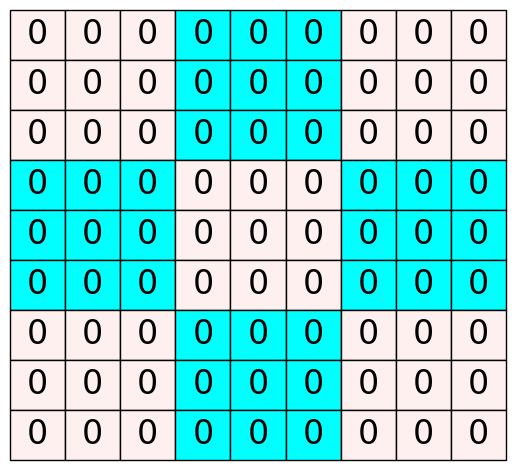

In [76]:
import matplotlib.pyplot as plt

#Fonction d'affichage d'un Sudoku...
def display_sudoku(sudoku, font_colors=None):
    fig, ax =plt.subplots(1,1)
    ax.axis('tight')
    ax.axis('off')
    colors = [[ "#FFF0F0" if (i//3,j//3) in {(0,0), (1,1), (0,2), (2,0), (2,2)} else "#00ffff"  for j in range(9)] for i in range(9)]
    t = plt.table(cellText=sudoku,loc="center", cellLoc="center", cellColours=colors )
    t.set_fontsize(24)
    t.scale(1,3)
    if font_colors is not None:
        for i in range(9):
            for j in range(9):
                t[i, j].get_text().set_color(font_colors[i][j])
    plt.show()

sudoku = [[0] * 9] * 9
display_sudoku(sudoku)

In [77]:
#Fonction qui retourne les éléments dans la meme ligne, colonne ou sous-case que la cellule (i, j)...
def get_prohibited_region(i, j):
    region_i = i//3
    region_j = j//3
    #print(f"i = {i}, j = {j}, region = {region}")
    return {(i, k) for k in range(9)} | \
           {(k, j) for k in range(9)} | \
           {((k1//3) + 3 * region_i, (k2//3) + 3 * region_j) for k1 in range(9) for k2 in range(9)}

#Fonction qui retourne les valeurs qui ne peut pas prendre la cellule (i, j)...
def get_prohibited_values(puzzle, i, j):
    region_i = i//3
    region_j = j//3
    if puzzle[i][j] == 0:
        prohibited = set()
        for i2, j2 in get_prohibited_region(i, j):
            prohibited = prohibited | {puzzle[i2][j2]}
    else: prohibited = set(range(1, 10))
    return prohibited

#Fonction qui retourne la couleur attribué aux cellules remplies par l'algorithme...
def get_font_color(puzzle):
    color = [[ "#000000" if puzzle[i][j] > 0 else "#FF0000" for j in range(9)] for i in range(9)]
    return color
                

#Fonction qui résout le Sudoku...
def sudoku(puzzle):
    
    font_color = get_font_color(puzzle)
    
    #Initialisation de la structure Possible...
    total_possible = [[ set(range(1, 10))  for _ in range(9)] for _ in range(9)]
    possible = [[ total_possible[i][j] - get_prohibited_values(puzzle, i, j) for j in range(9)] for i in range(9)]
    precedent_possible = [[ possible[i][j].copy() for j in range(9)] for i in range(9)]
    
    stop = all([ puzzle[i][j] != 0 for i in range(9) for j in range(9)])
    impossible = False
    
    #Faire des passes sur le puzzle jusqu'à résolution ou bloquage...
    while not stop:
        for i in range(9):
            for j in range(9):
                #Tester si la cellule n'est pas déjà remplie...
                if puzzle[i][j] == 0:
                    if len(possible[i][j]) == 1: #Si la cellule ne peut prendre qu'une seule valeur possible...
                        puzzle[i][j], = possible[i][j] #Affecter cette valeur à la cellule...
                        possible[i][j] = set()
                        for i2, j2 in get_prohibited_region(i, j): #MAJ la structure Possible
                            possible[i2][j2] = possible[i2][j2] - {puzzle[i][j]}
                    elif len(possible[i][j]) == 0: #S'il y n'a pas de valeurs possible pour la cellule (i,j)...
                        impossible = True #BLOQUAGE: l'algorithme sort sans trouver de solution...
                        break
            if impossible: break
        if impossible: break
        
        stagn = all([ possible[i][j] == precedent_possible[i][j] for j in range(9) for i in range(9)])
        if stagn: #STAGNATION: On ne peut pas affecter avec sureté une valeur à une cellule...
            for i in range(9):
                try: index = puzzle[i].index(0)
                except: continue
                puzzle[i][index] = list(possible[i][index])[0] #On attribue la première valeur possible à la cellule (i, index)...
                for i2, j2 in get_prohibited_region(i, index): #MAJ la structure Possible...
                    possible[i2][j2] = possible[i2][j2] - {puzzle[i][index]}
                break
                    
        stop = all([ puzzle[i][j] != 0 for i in range(9) for j in range(9)]) #FIN: toutes les cellules du Sudoku sont remplies...
        precedent_possible = [[ possible[i][j].copy() for j in range(9)] for i in range(9)]
        #display_sudoku(puzzle)
        
        
    #Affichage du Sudoku...    
    display_sudoku(puzzle, font_colors=font_color)
    return not impossible
    

# <font color='green'><ins> Testes</ins></font>

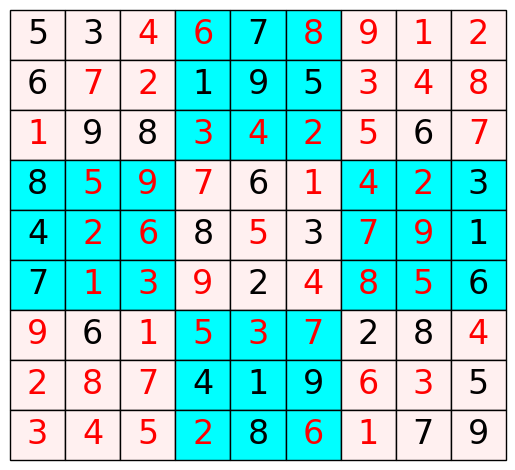

True

In [78]:
puzzle = [[5, 3, 0, 0, 7, 0, 0, 0, 0],
          [6, 0, 0, 1, 9, 5, 0, 0, 0],
          [0, 9, 8, 0, 0, 0, 0, 6, 0],
          [8, 0, 0, 0, 6, 0, 0, 0, 3],
          [4, 0, 0, 8, 0, 3, 0, 0, 1],
          [7, 0, 0, 0, 2, 0, 0, 0, 6],
          [0, 6, 0, 0, 0, 0, 2, 8, 0],
          [0, 0, 0, 4, 1, 9, 0, 0, 5],
          [0, 0, 0, 0, 8, 0, 0, 7, 9]]
sudoku(puzzle)

# <font color='red'><ins> 1 . 5 - Carré latins </ins></font>
# <font color='green'><ins> Formulation du problème </ins></font>
Un carré latin d'ordre $N$ est une matrice carrée dont chaque ligne et chaque colonne est une permutation des nombres de $1$ à $N$. La trace d'une matrice carrée $A = (a_{ij})_{1 \le i, j \le N}$ est la somme de ses éléments diagonaux i.e.:
$$
tr(A) = \sum \limits _{i = 1} ^{N} a_{ii}
$$

Etant donné $N$ et $K$ deux entier positives, on veut trouver un carré latin d'ordre $N$ et de trace $K$ ou dire s'il n'existe pas.
# <font color='green'><ins>Solution </ins></font>
## <font color='blue'><ins>Axioms</ins> </font>
On commence par introduire des éléments nécessaire à la résolution du problème:  
### <font color='#FFD700'> <ins>Axiom 1.</ins></font> une matrice circulaire est un cas particulier des carrés latins.
Les carrés circulaires sont de la forme suivante:  

$
\begin{bmatrix} 
1 & 2 & 3 & \dots & \dots & N \\ N & 1 & 2 & \dots & \dots & N-1 \\ N-1 & N & 1 & \dots & \dots & N-2 \\ \dots & \dots & \dots & \dots & \dots & \dots \\ \dots & \dots & \dots & \dots & \dots & \dots \\2 & 3 & 4 & \dots & \dots & 1
\end{bmatrix}
$$\quad
\text{ou plus généralement: }
\quad$
$
\begin {bmatrix} 
a_{1} & a_{2} & a_{3} & \dots & \dots & a_{N}  \\ a_{N}  & a_{1} & a_{2} & \dots & \dots & a_{N} \\ a_{N-1} & a_{N}  & a_{1} & \dots & \dots & a_{N-2} \\ \dots & \dots & \dots & \dots & \dots & \dots \\ \dots & \dots & \dots & \dots & \dots & \dots \\a_{2} & a_{3} & a_{4}  & \dots & \dots & a_{1}
\end{bmatrix}
$  

Tel que $a_0, a_1, ..., a_N$ sont $N$ nombres distincts entre $1$ et $N$.  
**Il est clair que les matrices carrées circulaires sont des carrés latins.**   
### <font color='#FFD700'> <ins>Axiom 2.</ins></font> Si on échange deux lignes ou deux colonnes d'un carré latin, le résultat est aussi un carré latin. 
Dans le cas ou on échange deux lignes $i$ et $j$ d'une matrice, il suffit de constater qu'on n'a qu'a échangé les $i$em et $j$em  éléments de chaque colonne. Les colonnes restent, donc, des permutations des nombre entre $1$ et $N$ (sans répétition). De plus, l'échange de deux lignes n'affecte pas la validité des lignes. Donc **le résultat est aussi un carré latin**.
On peut appliquer le meme raisonnement en cas d'échange de deux colonnes.  
### <font color='#FFD700'> <ins>Axiom 3.</ins></font> Tout entier $K \in [2, 2N]$ peut s'écrire comme $K = B + C$ tel que $B \in [1, N]$ et $C \in [1, N]$.   

## <font color='blue'><ins>Etude des cas pour la valeur de $K$:</ins></font>

## <font color='#FFD700'><ins> Cas $N \le 3$ (brute force solution): </ins></font>   
On teste toutes les matrices carrées d'ordre $N$ tel que chaque ligne est une permutation des nombres entre $1$ et $N$. Si une telle matrice vérifie les propriétés d'une solution i.e. est un carré latin et de trace $K$ alors en retourne cette solution. Si toutes les matrices possibles sont épuisées sans trouver une solution alors le problème n' en admet pas une.  
Il existe $(N!)^N$ de ces matrices (= $216$ dans le cas de $N = 3$). 
## <font color='#FFD700'><ins>Cas $K < N$ ou $K > N^2$: </ins></font>  
La plus petite trace qu'un carré latin $A$ d'ordre $N$ peut avoir est la trace de $A$ quand les $a_{ii} = 1$ dans ce cas $tr(A) = N$. De meme, la plus grande trace  est quand les $a_{ii} = N$ dans ce cas $tr(A) = N^2$. Donc:  
**pour $K < N$ ou $K > N^2$: le carré latin n'existe pas**.
## <font color='#FFD700'><ins> Cas $K = N$ ou $K = N^2$:  </ins></font>  
Les carrés circulaires suivants sont des solutions au problème.  
**cas $k = N$:** $\quad$
$
\begin{bmatrix} 
1 & 2 & 3 & \dots & \dots & N \\ N & 1 & 2 & \dots & \dots & N-1 \\ N-1 & N & 1 & \dots & \dots & N-2 \\ \dots & \dots & \dots & \dots & \dots & \dots \\ \dots & \dots & \dots & \dots & \dots & \dots \\2 & 3 & 4 & \dots & \dots & 1
\end{bmatrix}
$ $\quad$
**cas $k = N^2$:** $\quad$
$
\begin{bmatrix} 
N & 1 & 2 & \dots & \dots & N-1 \\ N-1 & N & 1 & \dots & \dots & N-2 \\ N-2 & N-1 & N & \dots & \dots & N-3 \\ \dots & \dots & \dots & \dots & \dots & \dots \\ \dots & \dots & \dots & \dots & \dots & \dots \\ 1 & 2 & 3 & \dots & \dots & N
\end{bmatrix}
$  

## <font color='#FFD700'> <ins>Cas $K = N + 1$ ou $K = N^2 - 1$: </ins></font>  
Si $K = N$ les seules diagonales dont la somme des éléments est $N + 1$ sont les diagonales avec **$N$ occurences de $1$ et exactement une occurence de $2$**, par exemple:
$$
\begin {bmatrix} 
1 & \dots & \dots & \dots & \dots & \dots  \\ \dots  & 1 & \dots & \dots & \dots & \dots \\ \dots & \dots & 1 & \dots & \dots & \dots \\ \dots & \dots & \dots & \dots & \dots & \dots \\ \dots & \dots & \dots & \dots & 1 & \dots \\ \dots & \dots & \dots  & \dots & \dots & 2
\end{bmatrix}
$$
Dans ce cas, **on ne peut pas placer le $1$** de la dernière ligne puisqu'on a un $2$ sur la diagonale et dans chaque autre colonne du carré un $1$ sur l'élément diagonale. Le meme raisonnement peut etre appliqué sur le cas $K = N^2 - 1$, ou les seules diagonales dont la somme des éléments est $N^2 - 1$ sont les diagonales avec **$N - 1$ occurences de $N$ et exactement une occurence de $N - 1$**. Donc:  
**pour $K = N + 1$ ou $K = N^2 - 1$: le carré latin n'existe pas**
## <font color='#FFD700'><ins>cas $K > N + 1$ et $K < N^2 - 1$: </ins></font>    
Preuve que tout nombre $K$ entre $N + 2$ et $N^2 - 2$ peut s'écrire comme la somme suivante:  



$$
\boxed{
K = A + A + \dots (N - 2 \text{ fois}) \dots + A + B + C = (N - 2).A+B+C \quad \text{tel que} \quad A \ne B \quad \text{et} \quad A \ne C \quad \dots (*)}
$$  



On procède par découper l'intervalle des entiers $I = [N + 2, N^{2} - 2]$ sur deux intervalles $I_{1} = [N + 2, (N - 2)N + 2[$ et $I_{2} = [(N - 2)N + 2, N^{2} - 2]$, donc $I = I_{1} \bigcup I_{2}$


### <font color='#00FF00'> <ins>Cas $K \in I_{1}$: </ins></font>
$$\boxed{K = (N-1).N + K^{'} \quad \text{tq: } \quad K^{'} \ge 2 \quad \dots (1)}$$  
On a aussi:  
$$\boxed{N^{2} - 2 - (N - 2).N = N^{2} - 2 - N^{2} + 2N = 2N - 2 \quad \dots (2)}$$
De $(1)$ et $(2)$, on conclue que **$2 \le K^{'} \le 2N - 2$**  
Donc d'après **Axiom 3.**, $\exists B, C \in [1, N - 1] \quad \text{tel que} \quad K^{'} = B + C$  
<font color='red'><ins>Donc, **$(*)$ est vérifiée**</ins></font>   (en prenant $A = N$)




### <font color='#00FF00'> <ins>Cas $K \in I_{2}$ (çad $A \lt N$):  </ins></font>
### <ins>Démonstration par récurrence:</ins>    
**1. Pour $K = N + 2$:**
$$N + 2 = (N - 2).1 + 2 + 2$$  
donc on prend $A = 1$, $B = 2$ et $C = 2$.


<font color='red'><ins>Donc, **$(*)$ est vérifiée**</ins></font>  


**2. Pour $K \gt N + 2$**, Supposons que $(*)$ est vérifiée pour $K$, et démontrons qu'elle est vérifiée pour $K + 1$:  
On a:  
$$\boxed{
K = A + A + \dots (N - 2 \text{ fois}) \dots + A + B + C = (N - 2).A+B+C \quad \text{tel que} \quad A \ne B \quad \text{et} \quad A \ne C}
$$
On démontre:  
$$\boxed{
K = A^{'} + A^{'} + \dots (N - 2 \text{ fois}) \dots + A^{'} + B^{'} + C^{'} = (N - 2).A^{'}+B^{'}+C^{'} \quad \text{tel que} \quad A^{'} \ne B^{'} \quad \text{et} \quad A^{'} \ne C^{'}}
$$
Pour simplifier la démonstration on prend **$B^{'} = A^{'} + 2$ et $C^{'} \ne A^{'}$** sinon (si ce n'est pas possible) on prend **$B^{'} = C^{'} = A^{'}+1$**, ce qui est vérifié pour $K = N + 2$ parce qu'on a $B = C = 2 = A + 1$ 


* Si $B = C = A + 1$:   
    + Si $B \lt N$ alors: 
        - $A^{'} \leftarrow A$  
        - $B^{'} \leftarrow B + 1$  
        - $C^{'} \leftarrow C$  
    + Sinon $B = C = A + 1 = N$ donc $K = N^{2} - N + 2$ donc $K \in I_{2}$  
* Sinon $B = A + 2$ et $C \ne A$:  
    + Si $C \ne A - 1$ et $C \lt N$ alors: 
        - $A^{'} \leftarrow A$ 
        - $B^{'} \leftarrow B$ 
        - $C^{'} \leftarrow C + 1$  
    + Sinon Si $C = A - 1$ alors: 
        - $A^{'} \leftarrow A$ 
        - $B^{'} \leftarrow B - 1$ 
        - $C^{'} \leftarrow C + 2$  
    + Sinon $C = N$ alors: 
        - $A^{'} \leftarrow A + 1$ 
        - $B^{'} \leftarrow B + 1$ 
        - $C^{'} \leftarrow 1$  


<font color='red'><ins>Donc, **$(*)$ est vérifiée**</ins></font>  


Nous avons démontrer que tout nombre $K$ entre $N + 2$ et $N^2 - 2$ peut s'écrire comme la somme suivante:  
$$ \boxed{
K = A + A + \dots (N - 2 \text{ fois}) \dots + A + B + C = (N - 2).A+B+C \quad \text{tel que} \quad A \ne B \quad \text{et} \quad A \ne C \quad \dots (*)}
$$



## <font color='blue'> <ins>Construction du carré latin dans le cas général: </ins></font>
Maintenant, pnous allons **construire le carré latin correspondant**, Nous distinguons deux cas possible:  
## <font color='#FFD700'><ins>1. Cas $B \ne C$:</ins></font>  
Nous considérons la matrice circulaire suivante. Cette matrice est un carré latin d'après **Axiom 1.**, donc l'échange de la $N$ième et la $N-1$ième ligne de cette matrice donne aussi un carré latin d'après **Axiom 2.**. Par conséquence, le carré latin dans ce cas est le suivant:  
$\quad$$\quad$$\quad$$\quad$$
\begin{bmatrix} 
A & B & a_{3} & \dots & \dots & C \\ C & A & B & \dots & \dots & a_{N-2} \\ a_{N-2} & C & A & B & \dots & a_{N-3} \\ \dots & \dots & \dots & \dots & \dots & \dots \\ \dots & \dots & \dots & C & A & B \\ B & \dots & \dots & \dots & C & A
\end{bmatrix}
$ $\quad$$\quad$ $\rightarrow$ $\quad$$\quad$
$
\begin{bmatrix} 
A & B & a_{3} & \dots & \dots & C \\ C & A & B & \dots & \dots & a_{N-2} \\ a_{N-2} & C & A & B & \dots & a_{N-3} \\ \dots & \dots & \dots & \dots & \dots & \dots \\ B & \dots & \dots & \dots & C & A \\  \dots & \dots & \dots & C & A & B
\end{bmatrix}
$  
## <font color='#FFD700'><ins>2. Cas $B = C$: </ins></font> 
Nous distinguons deux possibilités selon la valeur de $N$:  
## <font color='#00FF00'><ins>2.1. Cas $N = 2n$ est pair: </ins></font>    
Nous démontrons un exemple de construction avec $A = 1$ et $B = C = 2$ et $N = 6$, cette construction peut etre étendu à $B$ et $C$ quelconque en utilisant la forme généralisée de la matrice circulaire.  
 
Soit la matrice circulaire suivante. Pour les colonnes $1$ et $3$ on échange les éléments de ligne **paire**. Cette matrice est un carré latin. Donc, d'après **Axiom 2.**, l'échange de la $1$ière et la $2$ième lignes donne aussi un carré latin qui est le suivant:  

$\quad$ $\quad$ $\quad$ $\quad$ $\quad$ $
\begin{bmatrix} 
1 & 2 & 3 & 4 & 5 & 6 \\ 6 & 1 & 2 & 3 & 4 & 5  \\ 5 & 6 & 1 & 2 & 3 & 4 \\ 4 & 5 & 6 & 1 & 2 & 3  \\ 3 & 4 & 5 & 6 & 1 & 2 \\ 2 & 3 & 4 & 5 & 6 & 1 
\end{bmatrix}
$ $\quad$ $\rightarrow$ $\quad$ $
\begin{bmatrix} 
1 & 2 & 3 & 4 & 5 & 6 \\ 2 & 1 & 6 & 3 & 4 & 5  \\ 5 & 6 & 1 & 2 & 3 & 4 \\ 6 & 5 & 4 & 1 & 2 & 3  \\ 3 & 4 & 5 & 6 & 1 & 2 \\ 4 & 3 & 2 & 5 & 6 & 1 
\end{bmatrix}
$ $\quad$ $\rightarrow$ $\quad$  $
\begin{bmatrix} 
2 & 1 & 6 & 3 & 4 & 5  \\ 1 & 2 & 3 & 4 & 5 & 6 \\ 5 & 6 & 1 & 2 & 3 & 4 \\ 6 & 5 & 4 & 1 & 2 & 3  \\ 3 & 4 & 5 & 6 & 1 & 2 \\ 4 & 3 & 2 & 5 & 6 & 1 
\end{bmatrix}
$




## <font color='#00FF00'><ins>2.2. Cas $N = 2n+1$ est impair:</ins></font>    
Nous allons traiter **sans perte de généralisation** le cas ou $B = C = 2$ et $A = 1$ et $N = 7$.  
Soit la matrice circulaire suivante:

On effectue les quatres transformations suivantes:  
1. Echanger chaque $1$er et le $3$ièm éléments de chaque ligne **paire** sauf la dernière (donc les lignes $\{1, 2, \dots, 2n - 2\}$).  
2. Faire une rotation droite sur les trois premiers éléments de la ligne avant-dernière (ligne $2n$). ça sera toujours $(3, 4, 5) \rightarrow (5, 3, 4)$  
3. Faire une rotation gauche sur les trois premiers éléments de la dernière ligne (ligne $2n + 1$). ça sera toujours $(2, 3, 4) \rightarrow (3, 4, 2)$  
4. Echanger la $1$ière et la $2$ièm ligne.  
La matrice finale est la suivante:  
$\quad$ $\quad$ $\quad$ $\quad$ $\quad$
$
\begin{bmatrix} 
1 & 2 & 3 & 4 & 5 & 6 & 7 \\ 7 & 1 & 2 & 3 & 4 & 5 & 6 \\ 6 & 7 & 1 & 2 & 3 & 4 & 5 \\ 5 & 6 & 7 & 1 & 2 & 3 & 4 \\ 4 & 5 & 6 & 7 & 1 & 2 & 3\\ 3 & 4 & 5 & 6 & 7 & 1 & 2 \\ 2 & 3 & 4 & 5 & 6 & 7 & 1
\end{bmatrix}
$ $\quad$ $\rightarrow$ $\quad$
$
\begin{bmatrix} 
 2 & 1 & 7 & 3 & 4 & 5 & 6 \\ 1 & 2 & 3 & 4 & 5 & 6 & 7 \\ 6 & 7 & 1 & 2 & 3 & 4 & 5 \\ 7 & 6 & 5 & 1 & 2 & 3 & 4 \\ 4 & 5 & 6 & 7 & 1 & 2 & 3\\ 5 & 3 & 4 & 6 & 7 & 1 & 2 \\ 3 & 4 & 2 & 5 & 6 & 7 & 1
\end{bmatrix}
$  

## <ins>Remarque:  </ins>   
En pratique, nous trouvons les coefficient $A$, $B$ et $C$ par recherche exhaustive tel que: $A \in \{ 1, 2, \dots, N\}$, $B \in \{ 1, 2, \dots, N\}$ et $C = K - (N - 2).A - B$
# <font color='green'><ins> Complexité </ins></font>  
Dans le pire des cas $N + 2 \le K \le N^2 - 2$, $A \ne B$ et $B = C$:
$$
\begin{align}
\text{Temps total} & = \text{Temps de recherche de A, B et C} + \text{Temps de construction de la matrice circulaire} +\text{Temps d'effectuer les transformations}  \\
& = O(N^2) + O(N) + O(N)  \\
& = O(N^2) \\
\end{align}
$$
# <font color='green'><ins> Code </ins></font>   
La section suivante présente le code Python qui implémente a solution proposée.

In [83]:
from copy import deepcopy

#Fonction permutations définie précédemant...
#utilisée pour la solution brute force N < 4...
def permutations(nums):
    N = set(nums)
    if len(N) == 1: 
        return [nums]
    else:
        res = []
        for n in N:
            temp = permutations(list(N - {n}))
            res.extend([[n] + t for t in temp])
        return res

#Fonction qui retourne la liste de toutes la matrice d'ordre N tq chaque ligne une permutation de [1, N]...
#utilisée pour la solution brute force N < 4...
def carre_latin_rec(N, l, perms):
    if len(l[0]) == N:
        return l
    else:
        l2 = []
        for mat in l:
            for p in perms:
                mat_copy = deepcopy(mat)
                mat_copy.append(p)
                l2.append(mat_copy)
        return carre_latin_rec(N, l2, perms)


#Fonction qui retourne un carre latin circulair avec "nums" comme première ligne...
def caree_latin_circulair(nums):
    mat = []
    for _ in range(len(nums)):
        mat.append(nums)
        nums = [nums[-1]] + nums[:-1]
    return mat


#Fonction qui retourne un carre latin d'ordre N et de trace K, ou "None" s'il n'existe pas...
def carre_latin(N, K):
    
    #Cas particuliers ou le carré latin n'existe pas...
    if K < N or K > N**2 or K == N + 1 or K == N**2 - 1:
        return None
    
    #Cas particulier N < 4: solution par recherche exhaustive...
    if N <= 3:
        perms = permutations(range(1, N + 1))
        l = [[]]
        c = carre_latin_rec(N, l, perms)
        for m in c:
            latin = all([ False if (m[i][j1] == m[i][j2] or m[j1][i] == m[j2][i]) and j1 != j2 else True\
                         for j1 in range(N) for j2 in range(N) for i in range(N)] )
            trace = sum([m[i][i] for i in range(N)])
            if trace == K and latin: return m
        return None

    #Cas général...
    else:
        mat = [[0 for _ in range(N)] for _ in range(N)]
        A, B, C = None, None, None
            
        #Recherche des coeficients A, B et C...    
        for a in range(1, N + 1):
            for b in range(1, N + 1 ):
                c = K - (N - 2) * a - b
                if c <= N and c >= 1 and not (c != b and (b == a or c == a)):
                    A, B, C = a, b, c
                    break
            if A is not None: break
        
        nums = list(range(1, N + 1))
        #Cas A =/= B et B =/= C...
        if A != B and B != C:
            nums.remove(A)
            nums.remove(B)
            nums.remove(C)
            nums = [A, B] + nums + [C]
            mat = caree_latin_circulair(nums)
            mat[-1], mat[-2] = mat[-2], mat[-1]
            
            
        #Cas A == B == C...
        elif A == B and B == C:
            nums.remove(A)
            nums = [A] + nums
            mat = caree_latin_circulair(nums)
            
        #Cas A=/=B et B == C...
        elif A != B and B == C:
            nums.remove(A)
            nums.remove(B)
            nums = [A, B] + nums
            mat = caree_latin_circulair(nums)

            if N % 2 == 0: #Cas N pair...
                for i in range(1, N, 2):
                    mat[i][0], mat[i][2] = mat[i][2], mat[i][0]
            else: #Cas N impair...
                for i in range(1, N - 3, 2):
                    mat[i][0], mat[i][2] = mat[i][2], mat[i][0]
                mat[N - 2][0], mat[N - 2][1], mat[N - 2][2] = mat[N - 2][2], mat[N - 2][0], mat[n - 2][1]
                mat[N - 1][0], mat[N - 1][1], mat[N - 1][2] = mat[N - 2][1], mat[N - 2][2], mat[n - 2][0]
                
            mat[0], mat[1] = mat[1], mat[0]
        
        
        #retourner le carré latin mat, "None" si impossible...
        return mat
        

# <font color='green'><ins> Testes</ins></font>

In [90]:
N = 12
K = 54
m = carre_latin(N, K)
if m is not None: 
    print(f"Un carré latin d'ordre {N} et de trace {K} est: ")
    for i in range(N): print(m[i])
    print("La trace (somme des éléments diagonaux) = ", sum([m[i][i] for i in range(N)]))
else:
    print(f"Il n'existe pas un carré latin d' ordre {N} et de trace {K}!")

Un carré latin d'ordre 12 et de trace 54 est: 
[12, 3, 11, 1, 2, 4, 5, 6, 7, 8, 9, 10]
[3, 12, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]
[10, 11, 3, 12, 1, 2, 4, 5, 6, 7, 8, 9]
[11, 10, 9, 3, 12, 1, 2, 4, 5, 6, 7, 8]
[8, 9, 10, 11, 3, 12, 1, 2, 4, 5, 6, 7]
[9, 8, 7, 10, 11, 3, 12, 1, 2, 4, 5, 6]
[6, 7, 8, 9, 10, 11, 3, 12, 1, 2, 4, 5]
[7, 6, 5, 8, 9, 10, 11, 3, 12, 1, 2, 4]
[4, 5, 6, 7, 8, 9, 10, 11, 3, 12, 1, 2]
[5, 4, 2, 6, 7, 8, 9, 10, 11, 3, 12, 1]
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 3, 12]
[2, 1, 12, 4, 5, 6, 7, 8, 9, 10, 11, 3]
La trace (somme des éléments diagonaux) =  54


# Régression Logistique en NumPy

Dans cet exercice, nous allons implémenter la régression logistique en utilisant uniquement NumPy et Matplotlib. Nous comparerons deux méthodes d'optimisation : la descente de gradient et la méthode de Newton. Nous appliquerons ces méthodes sur trois jeux de données synthétiques et visualiserons les résultats.

## Importation des bibliothèques

Nous commençons par importer les bibliothèques nécessaires.


In [ ]:
# Deux seules libraries autorisées
import numpy as np
import matplotlib.pyplot as plt
# Pour l'imporation des datasets
from sklearn.datasets import make_moons, make_circles, make_blobs

## Importation des jeux de données

Nous utiliserons trois jeu de données pour tester notre modèle :

1. **make_moons** (Demi-cercles imbriqués)
2. **make_circles** (Cercles concentriques)
3. **make_blobs** (Blobs de points utilisant deux centres)


In [ ]:
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

## Visualisation des jeux de données

Visualisons les trois jeux de données générés.


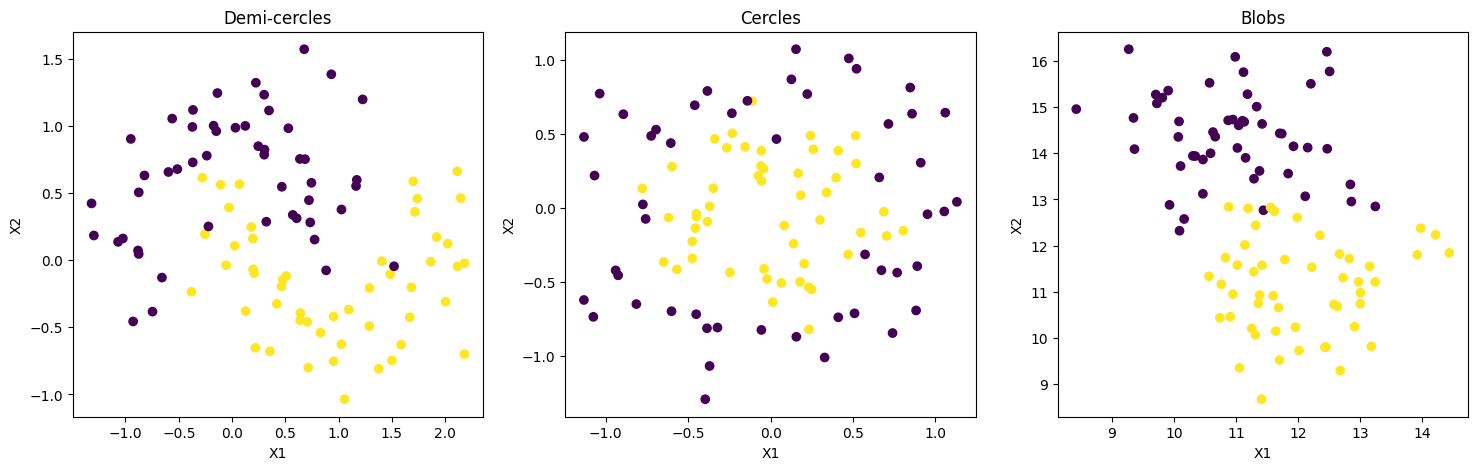

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (X, y), title in zip(axes, datasets, ['Demi-cercles', 'Cercles', 'Blobs']):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
plt.show()

## Implémentation de la classe `LogisticRegression`

Nous implémentons la classe `LogisticRegression` avec les méthodes `fit` et `predict`. La classe accepte un paramètre `optimizer` pour choisir la méthode d'optimisation (`'gradient_descent'` ou `'newton'`).

### Détails de l'implémentation

- **Fonction sigmoïde** : $\sigma(x) = \frac{1}{1 + e^{-x}}$
- **Fonction de perte** : $L(\beta) = -\sum_i \left[ y_i \log(\sigma(x_i^T\beta)) + (1 - y_i) \log(1 - \sigma(x_i^T\beta)) \right]$
- **Gradient de la perte** : $\nabla L = X^T (\sigma(X \beta) - y)$

Nous ajoutons également une colonne de 1 à \(X\) pour inclure le biais (intercept).


In [ ]:
class LogisticRegression:
    def __init__(self, optimizer='gradient_descent', max_iter=100, tol=1e-6, alpha=None):
        self.optimizer = optimizer
        self.max_iter = max_iter
        self.tol = tol
        self.alpha = alpha  # Taux d'apprentissage pour la descente de gradient
        self.beta = None    # Vecteur des coefficients
        self.loss_history = []  # Pour stocker la perte à chaque itération

    def _sigmoid(self, z):
        # Fonction sigmoïde
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, X, y):
        # Calcul de la fonction de perte L(beta)
        z = X @ self.beta
        sigma = self._sigmoid(z)
        # Pour éviter log(0), on ajoute une petite valeur epsilon
        epsilon = 1e-15
        sigma = np.clip(sigma, epsilon, 1 - epsilon)
        L = y * np.log(sigma) + (1 - y) * np.log(1 - sigma)
        return -np.sum(L)

    def fit(self, X, y):
        # Ajout de la colonne de 1 pour l'intercept
        n_samples, n_features = X.shape
        X = np.hstack((np.ones((n_samples, 1)), X))
        # Initialisation de beta
        self.beta = np.zeros(n_features + 1)
        if self.optimizer == 'gradient_descent':
            self._gradient_descent(X, y)
        elif self.optimizer == 'newton':
            self._newton_method(X, y)
        else:
            raise ValueError("Optimizer non reconnu. Utilisez 'gradient_descent' ou 'newton'.")

    def predict(self, X):
        # Ajout de la colonne de 1 pour l'intercept
        n_samples = X.shape[0]
        X = np.hstack((np.ones((n_samples, 1)), X))
        z = X @ self.beta
        probabilities = self._sigmoid(z)
        return (probabilities >= 0.5).astype(int)

    def _gradient_descent(self, X, y):
        # Calcul de la plus grande valeur singulière de X
        lambda_max = np.linalg.norm(X, ord=2) ** 2
        # Détermination du taux d'apprentissage alpha
        if self.alpha is None:
            alpha = 1 / (3 * lambda_max)
        else:
            alpha = self.alpha
        for t in range(self.max_iter):
            z = X @ self.beta
            sigma = self._sigmoid(z)
            gradient = X.T @ (sigma - y)
            self.beta -= alpha * gradient
            # Calcul et stockage de la perte
            loss = self._compute_loss(X, y)
            self.loss_history.append(loss)
            # Vérification de la convergence
            if t > 0 and abs(self.loss_history[-2] - self.loss_history[-1]) < self.tol:
                print(f"Convergence atteinte en {t} itérations (descente de gradient).")
                break

    def _newton_method(self, X, y):
        for t in range(self.max_iter):
            z = X @ self.beta
            sigma = self._sigmoid(z)
            gradient = X.T @ (sigma - y)
            # Construction de la matrice diagonale pour le Hessien
            diag = sigma * (1 - sigma)
            H = X.T @ (diag[:, np.newaxis] * X)
            # Ajout d'une régularisation pour éviter les problèmes d'inversibilité
            H += np.eye(H.shape[0]) * 1e-5
            # Résolution du système linéaire H delta = gradient
            delta = np.linalg.solve(H, gradient)
            self.beta -= delta
            # Calcul et stockage de la perte
            loss = self._compute_loss(X, y)
            self.loss_history.append(loss)
            # Vérification de la convergence
            if np.linalg.norm(delta) < self.tol:
                print(f"Convergence atteinte en {t} itérations (méthode de Newton).")
                break

## Entraînement du modèle et comparaison des méthodes

Nous entraînons le modèle sur les trois jeux de données en utilisant les deux méthodes d'optimisation. Nous traçons l'évolution de la fonction de perte en fonction des itérations pour chaque méthode et chaque jeu de données.

### Fonction pour tracer les frontières de décision


In [ ]:
def plot_decision_boundary(model, X, y, ax, title):
    # Définir les limites du graphique
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02  # Pas du maillage
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Prédictions pour chaque point du maillage
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    # Tracé des contours
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    # Tracé des points de données
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

### Résultats sur les jeux de données

Pour chaque jeu de données, nous affichons :

- L'évolution de la fonction de perte en fonction des itérations pour les deux méthodes d'optimisation.
- Les frontières de décision obtenues avec chaque méthode, ainsi que les points de données colorés selon les prédictions du modèle.


Convergence atteinte en 6 itérations (méthode de Newton).


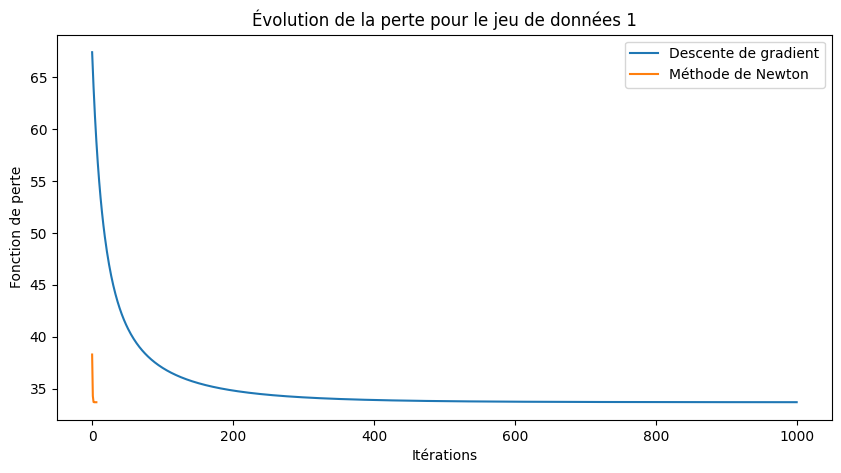

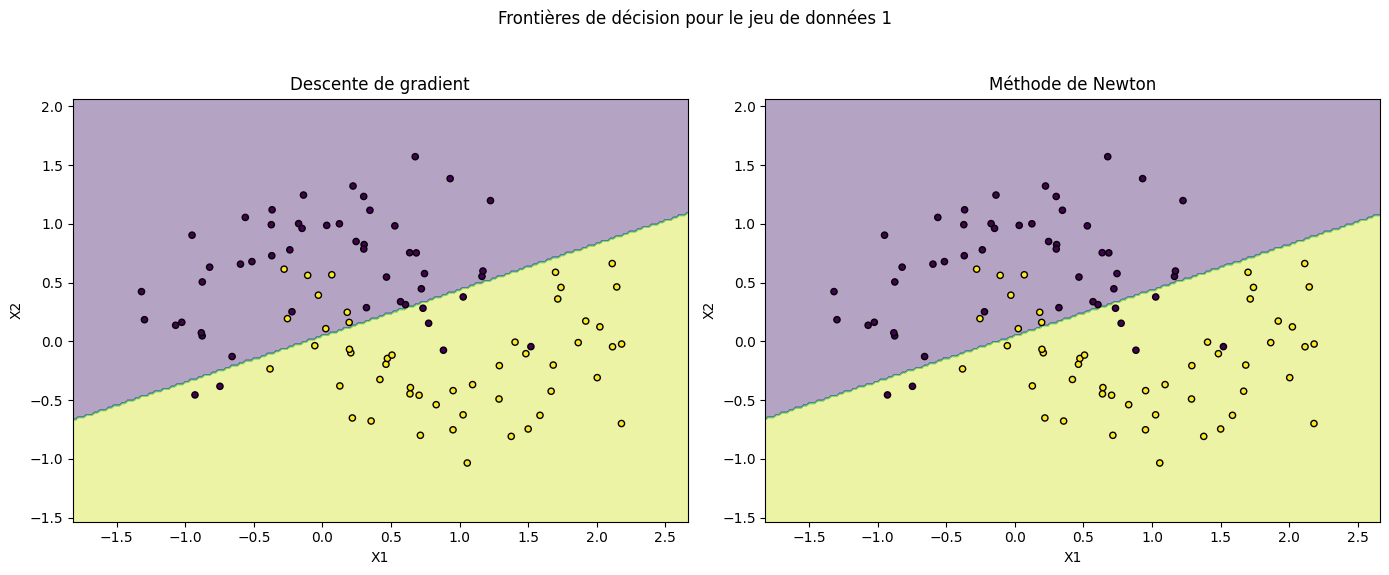

Convergence atteinte en 103 itérations (descente de gradient).
Convergence atteinte en 2 itérations (méthode de Newton).


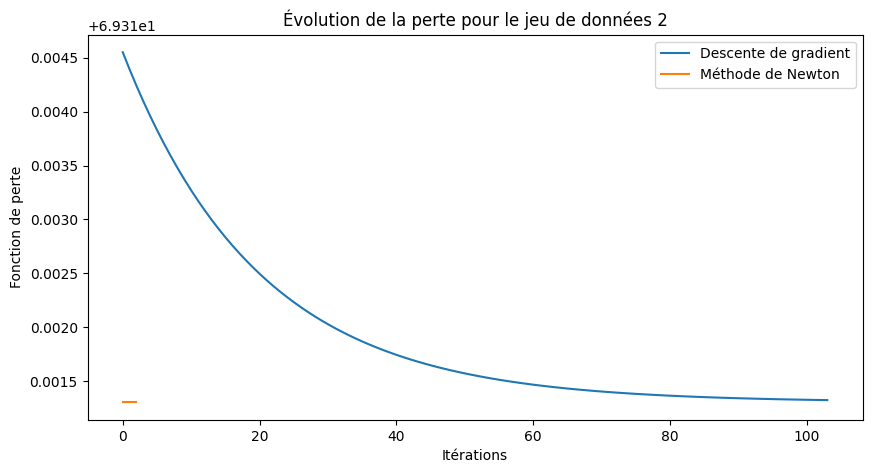

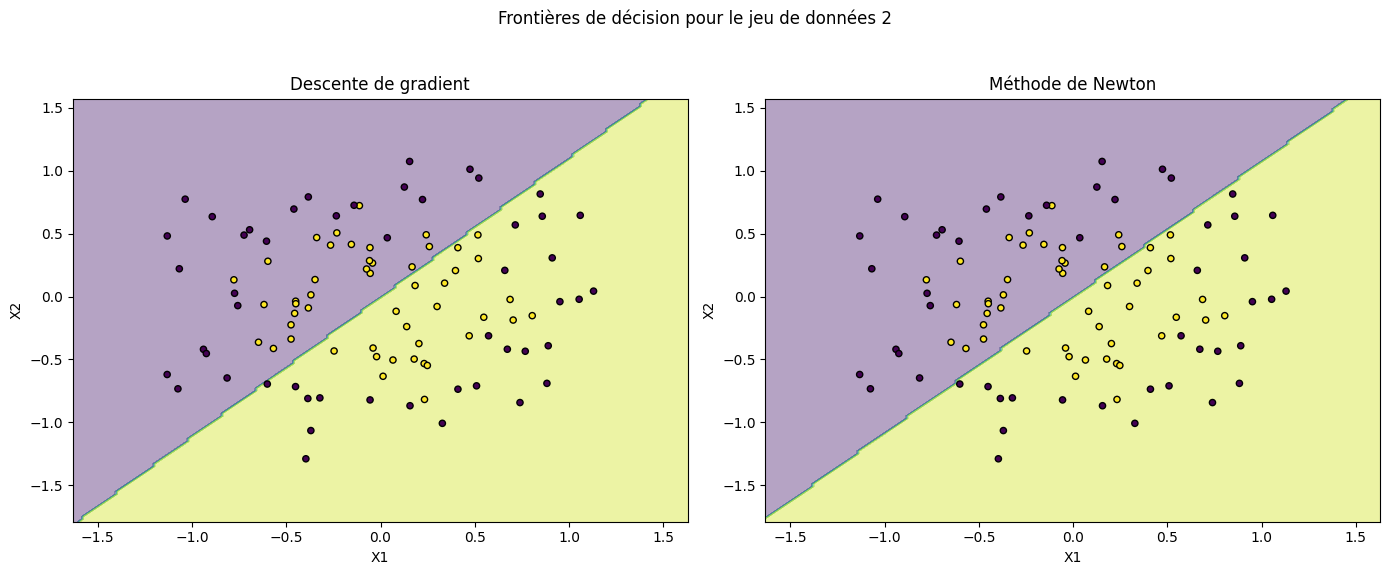

Convergence atteinte en 10 itérations (méthode de Newton).


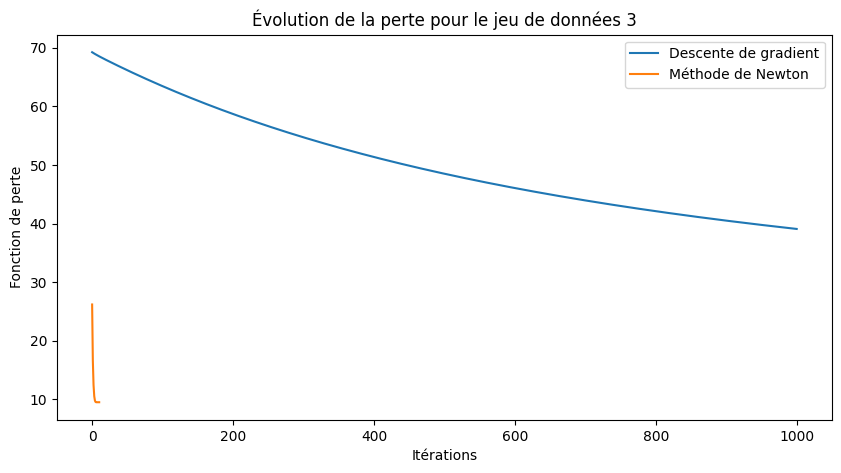

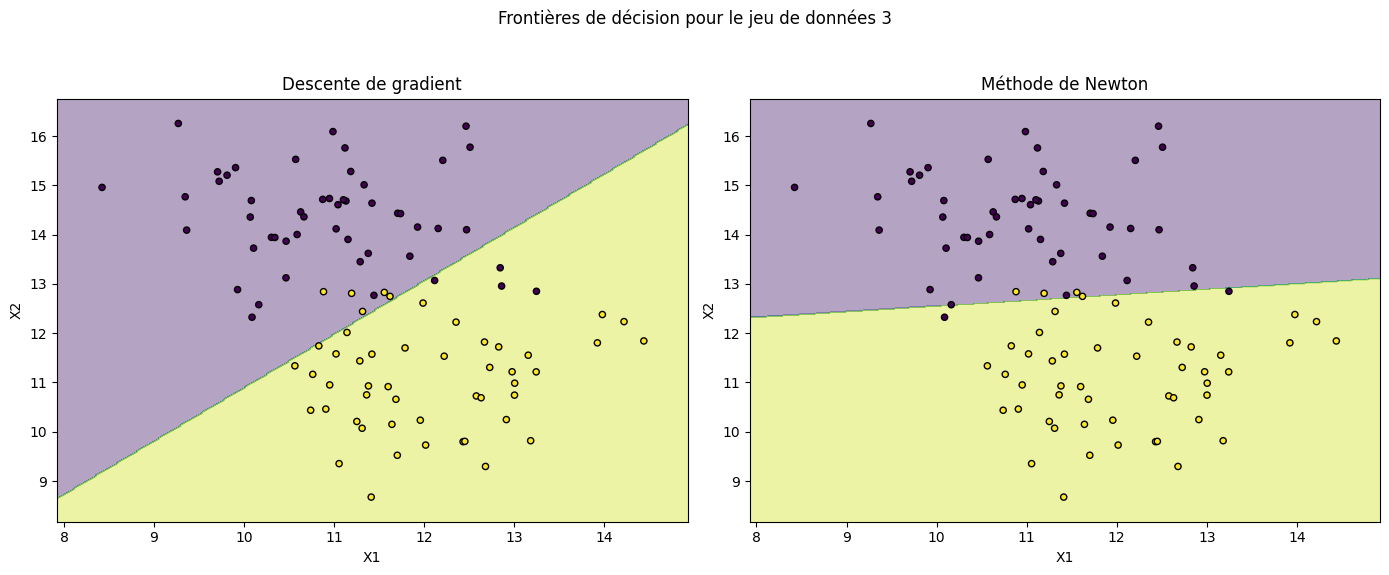

In [ ]:
for i, (X, y) in enumerate(datasets):
    # Modèle avec descente de gradient
    model_gd = LogisticRegression(optimizer='gradient_descent', max_iter=1000)
    model_gd.fit(X, y)
    loss_gd = model_gd.loss_history

    # Modèle avec méthode de Newton
    model_newton = LogisticRegression(optimizer='newton', max_iter=20)
    model_newton.fit(X, y)
    loss_newton = model_newton.loss_history

    # Tracé de l'évolution de la perte
    plt.figure(figsize=(10, 5))
    plt.plot(loss_gd, label='Descente de gradient')
    plt.plot(loss_newton, label='Méthode de Newton')
    plt.xlabel('Itérations')
    plt.ylabel('Fonction de perte')
    plt.title(f"Évolution de la perte pour le jeu de données {i+1}")
    plt.legend()
    plt.show()

    # Tracé des frontières de décision
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    plot_decision_boundary(model_gd, X, y, axes[0], 'Descente de gradient')
    plot_decision_boundary(model_newton, X, y, axes[1], 'Méthode de Newton')
    plt.suptitle(f"Frontières de décision pour le jeu de données {i+1}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**Remarque** : Les modèles de régression logistique linéaire ne sont pas capables de séparer correctement les données non linéairement séparables, comme les demi-cercles imbriqués et les cercles concentriques. Cependant, nous observons que la méthode de Newton converge généralement plus rapidement que la descente de gradient.

## Conclusion

Dans cet exercice, nous avons implémenté la régression logistique en utilisant deux méthodes d'optimisation : la descente de gradient et la méthode de Newton. Nous avons appliqué ces méthodes sur trois jeux de données synthétiques et comparé leurs performances. La méthode de Newton a montré une convergence plus rapide, mais elle est plus coûteuse en termes de calculs par itération en raison du calcul du Hessien et de son inversion.


# Arbres de Décision et Forêts Aléatoires en Pandas

Dans cet exercice, nous allons implémenter des algorithmes d'arbres de décision et de forêts aléatoires pour la classification en utilisant uniquement Pandas et Matplotlib. Nous appliquerons ces algorithmes sur trois jeux de données synthétiques générés à l'aide de scikit-learn.

## Importation des bibliothèques

Nous commençons par importer les bibliothèques nécessaires.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
import numpy as np  # Autorisé uniquement pour la visualisation

## Importation des jeux de données

Nous utiliserons trois jeu de données pour tester notre modèle :

1. **make_moons** (Demi-cercles imbriqués)
2. **make_circles** (Cercles concentriques)
3. **make_blobs** (Blobs de points utilisant deux centres)


In [ ]:
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

## Visualisation des jeux de données

Visualisons les trois jeux de données générés.


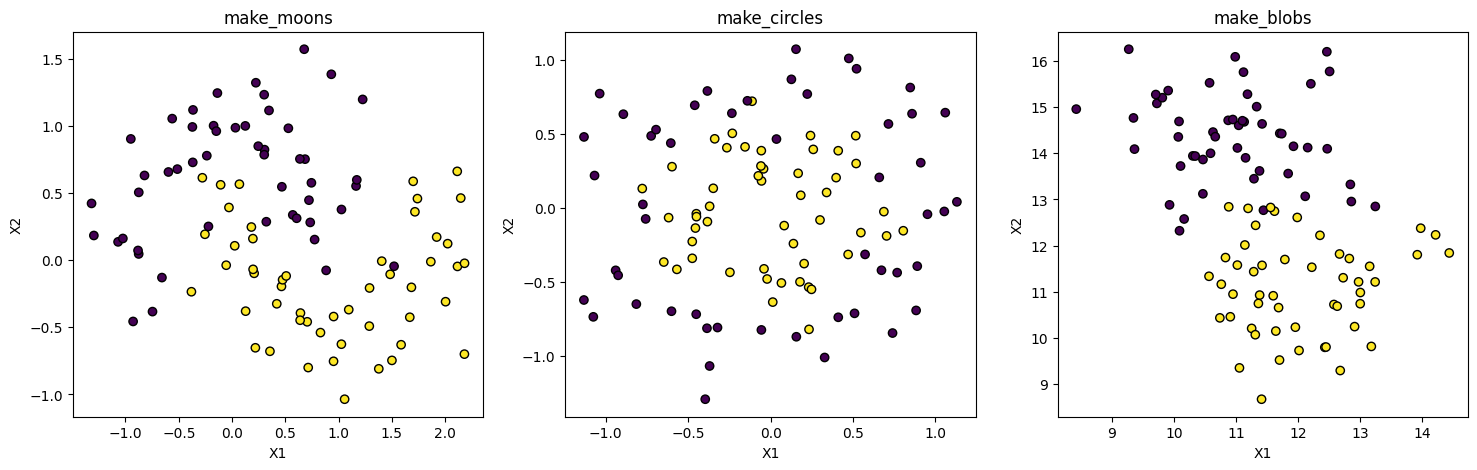

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (X, y), title in zip(axes, datasets, ['make_moons', 'make_circles', 'make_blobs']):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
plt.show()

## Implémentation de la classe `DecisionTree`

Nous allons implémenter la classe `DecisionTree` avec les méthodes `fit` et `predict`. Le critère d'impureté peut être soit l'entropie, soit l'indice de Gini.

### Détails de l'implémentation

- **Impureté Gini** :
  $$
  H(Q) = 1 - \sum_{i=0}^{k-1} \left(\frac{n_i}{n}\right)^2
  $$

- **Entropie** :
  $$
  H(Q) = -\sum_{i=0}^{k-1} \frac{n_i}{n} \log_2 \left( \frac{n_i}{n} \right)
  $$

- **Algorithme CART** :
  Nous suivons l'algorithme donné pour construire l'arbre de décision de manière récursive.

### Structure de l'arbre

Chaque nœud de l'arbre est représenté par un dictionnaire contenant :

- `feature_index` : l'indice de la caractéristique utilisée pour la division.
- `threshold` : la valeur seuil pour la division.
- `left` : le sous-arbre gauche.
- `right` : le sous-arbre droit.
- `value` : la classe majoritaire si le nœud est une feuille.


In [ ]:
class DecisionTree:
    def __init__(self, criterion='gini', max_depth=None, min_samples_split=2, max_features=None):
        """
        Initialise l'arbre de décision.

        :param criterion: Le critère d'impureté ('gini' ou 'entropy').
        :param max_depth: Profondeur maximale de l'arbre.
        :param min_samples_split: Nombre minimum d'échantillons pour diviser un nœud.
        :param max_features: Nombre maximum de caractéristiques à considérer pour une division.
        """
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.tree_ = None

    def fit(self, X, y):
        """
        Entraîne l'arbre de décision.

        :param X: Données d'entraînement sous forme de DataFrame Pandas.
        :param y: Étiquettes correspondantes.
        """
        dataset = X.copy()
        dataset['label'] = y
        self.tree_ = self._build_tree(dataset)

    def predict(self, X):
        """
        Prédit les classes pour les échantillons X.

        :param X: Données à prédire.
        :return: Prédictions.
        """
        predictions = X.apply(self._predict_sample, axis=1, args=(self.tree_,))
        return predictions.values

    def _gini(self, dataset):
        """
        Calcule l'impureté Gini pour un ensemble de données.

        :param dataset: Ensemble de données.
        :return: Impureté Gini.
        """
        labels = dataset['label']
        n = len(labels)
        if n == 0:
            return 0
        proportions = labels.value_counts() / n
        impurity = 1 - sum(proportions ** 2)
        return impurity

    def _entropy(self, dataset):
        """
        Calcule l'entropie pour un ensemble de données.

        :param dataset: Ensemble de données.
        :return: Entropie.
        """
        labels = dataset['label']
        n = len(labels)
        if n == 0:
            return 0
        proportions = labels.value_counts() / n
        entropy = -sum(proportions * np.log2(proportions))
        return entropy

    def _calculate_impurity(self, dataset):
        """
        Calcule l'impureté selon le critère choisi.

        :param dataset: Ensemble de données.
        :return: Impureté.
        """
        if self.criterion == 'gini':
            return self._gini(dataset)
        elif self.criterion == 'entropy':
            return self._entropy(dataset)
        else:
            raise ValueError("Le critère doit être 'gini' ou 'entropy'.")

    def _best_split(self, dataset):
        """
        Trouve la meilleure division pour l'ensemble de données.

        :param dataset: Ensemble de données.
        :return: Dictionnaire contenant les informations de la meilleure division.
        """
        best_gain = float('inf')
        best_split = None
        n_samples = dataset.shape[0]
        current_impurity = self._calculate_impurity(dataset)

        # Sélection aléatoire des caractéristiques (pour RandomForest)
        features = dataset.columns[:-1]  # Exclusion de la colonne 'label'
        if self.max_features is not None:
            features = features.to_series().sample(n=self.max_features, random_state=None)
            features = features.index
        else:
            features = features

        for feature in features:
            thresholds = dataset[feature].unique()
            for threshold in thresholds:
                left = dataset[dataset[feature] <= threshold]
                right = dataset[dataset[feature] > threshold]

                if len(left) == 0 or len(right) == 0:
                    continue

                # Calcul de l'impureté après la division
                impurity_left = self._calculate_impurity(left)
                impurity_right = self._calculate_impurity(right)
                n_left, n_right = len(left), len(right)
                impurity = (n_left / n_samples) * impurity_left + (n_right / n_samples) * impurity_right

                # Sélection de la division avec la plus faible impureté
                if impurity < best_gain:
                    best_gain = impurity
                    best_split = {
                        'feature': feature,
                        'threshold': threshold,
                        'left': left,
                        'right': right
                    }

        return best_split

    def _build_tree(self, dataset, current_depth=0):
        """
        Construit l'arbre de décision de manière récursive.

        :param dataset: Ensemble de données actuel.
        :param current_depth: Profondeur actuelle de l'arbre.
        :return: Nœud de l'arbre.
        """
        y = dataset['label']
        num_samples = dataset.shape[0]
        if num_samples >= self.min_samples_split and (self.max_depth is None or current_depth < self.max_depth):
            best_split = self._best_split(dataset)
            if best_split is not None:
                left_subtree = self._build_tree(best_split['left'], current_depth + 1)
                right_subtree = self._build_tree(best_split['right'], current_depth + 1)
                return {
                    'feature': best_split['feature'],
                    'threshold': best_split['threshold'],
                    'left': left_subtree,
                    'right': right_subtree
                }

        # Feuille : valeur majoritaire
        leaf_value = y.value_counts().idxmax()
        return leaf_value

    def _predict_sample(self, sample, tree):
        """
        Prédit la classe pour un échantillon unique en parcourant l'arbre.

        :param sample: Échantillon à prédire.
        :param tree: Arbre de décision.
        :return: Prédiction.
        """
        if isinstance(tree, dict):
            feature_value = sample[tree['feature']]
            if feature_value <= tree['threshold']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree

## Implémentation de la classe `RandomForest`

Nous allons maintenant implémenter la classe `RandomForest` en utilisant la classe `DecisionTree` que nous venons de définir.

### Détails de l'implémentation

- **Échantillonnage Bootstrap** :
  Pour chaque arbre, nous créons un échantillon aléatoire avec remise du jeu de données d'origine.

- **Sélection aléatoire des caractéristiques** :
  À chaque division d'un nœud, nous sélectionnons un sous-ensemble aléatoire des caractéristiques.

- **Agrégation des prédictions** :
  Pour la classification, nous utilisons le vote majoritaire parmi les arbres.


In [ ]:
class RandomForest:
    def __init__(self, n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2):
        """
        Initialise la forêt aléatoire.

        :param n_estimators: Nombre d'arbres dans la forêt.
        :param criterion: Critère d'impureté pour les arbres ('gini' ou 'entropy').
        :param max_depth: Profondeur maximale des arbres.
        :param min_samples_split: Nombre minimum d'échantillons pour diviser un nœud.
        """
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        """
        Entraîne la forêt sur le jeu de données.

        :param X: Données d'entraînement sous forme de DataFrame Pandas.
        :param y: Étiquettes correspondantes.
        """
        self.trees = []
        for i in range(self.n_estimators):
            # Échantillon bootstrap
            bootstrap_indices = y.sample(frac=1, replace=True).index
            X_bootstrap = X.loc[bootstrap_indices].reset_index(drop=True)
            y_bootstrap = y.loc[bootstrap_indices].reset_index(drop=True)

            # Nombre maximum de caractéristiques à considérer à chaque division
            max_features = int(np.sqrt(X.shape[1]))
            if max_features == 0:
                max_features = 1  # Assurer au moins une caractéristique

            # Créer et entraîner l'arbre
            tree = DecisionTree(
                criterion=self.criterion,
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=max_features
            )
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        """
        Prédit les classes pour les échantillons X en agrégeant les prédictions des arbres.

        :param X: Données à prédire.
        :return: Prédictions.
        """
        # Collecter les prédictions de chaque arbre
        predictions = pd.DataFrame()
        for i, tree in enumerate(self.trees):
            preds = tree.predict(X)
            predictions[f'tree_{i}'] = preds

        # Vote majoritaire
        final_predictions = predictions.mode(axis=1)[0]
        return final_predictions.values.astype(int)

## Entraînement et évaluation des modèles

Nous allons entraîner les modèles `DecisionTree` et `RandomForest` sur les trois jeux de données et visualiser les frontières de décision obtenues.

### Fonction pour tracer les frontières de décision


In [ ]:
def plot_decision_boundary(model, X, y, ax, title):
    # Définir les limites du graphique
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    h = 0.02  # Pas du maillage
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Prédictions pour chaque point du maillage
    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    # Tracé des contours
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    # Tracé des points de données
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

### Résultats sur les jeux de données

Pour chaque jeu de données, nous entraînons les modèles `DecisionTree` et `RandomForest` avec les critères 'gini' et 'entropy', puis nous visualisons les frontières de décision.

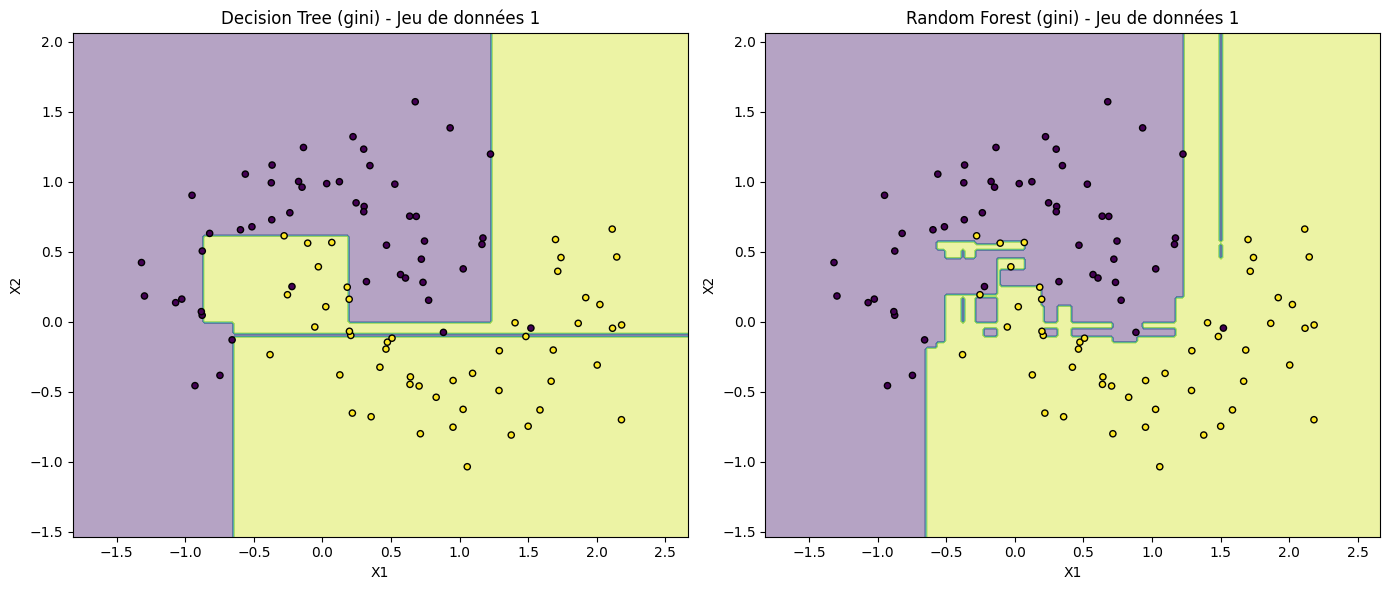

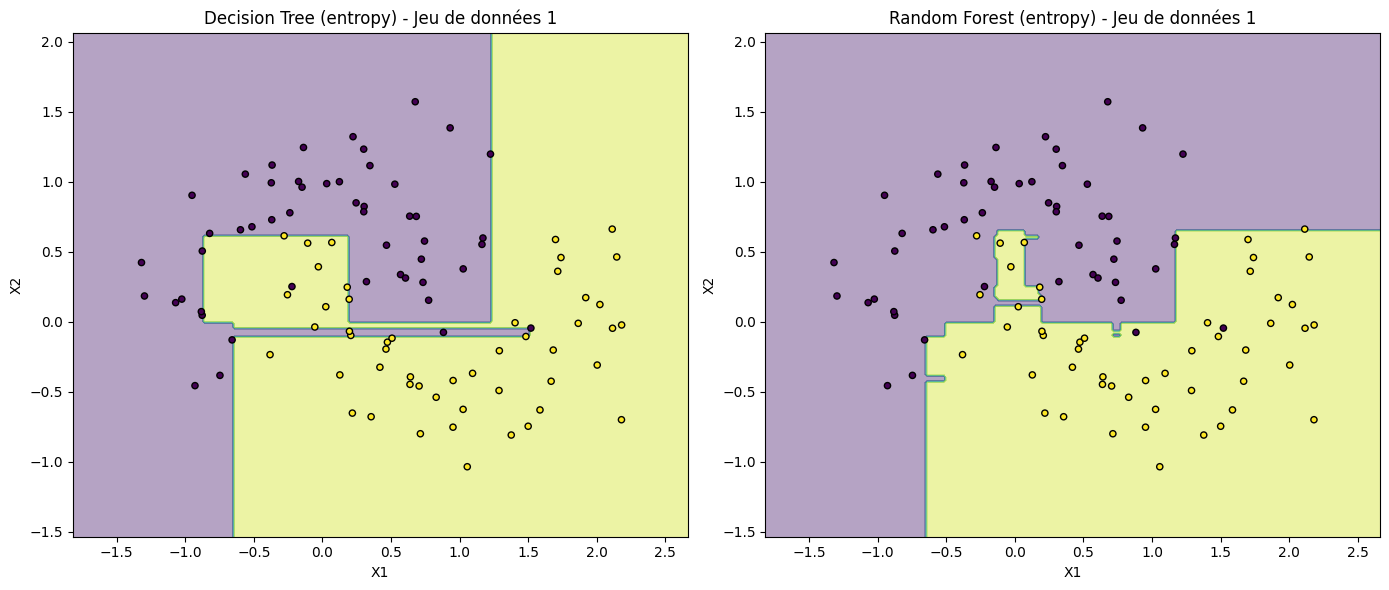

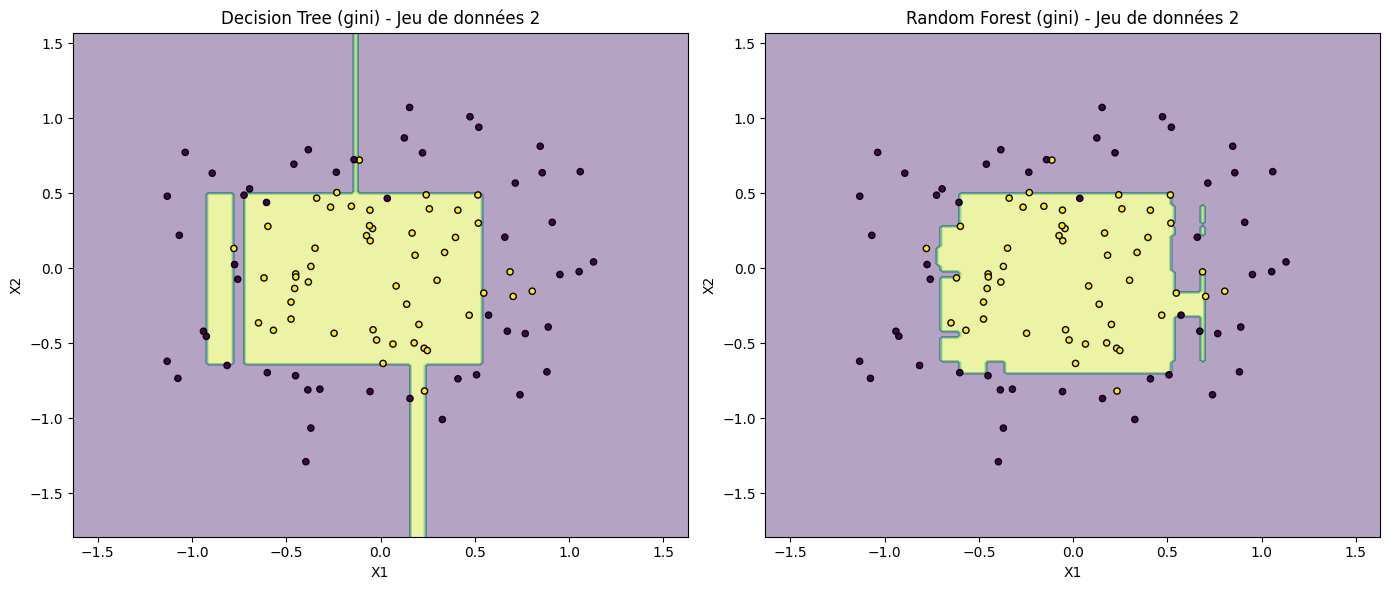

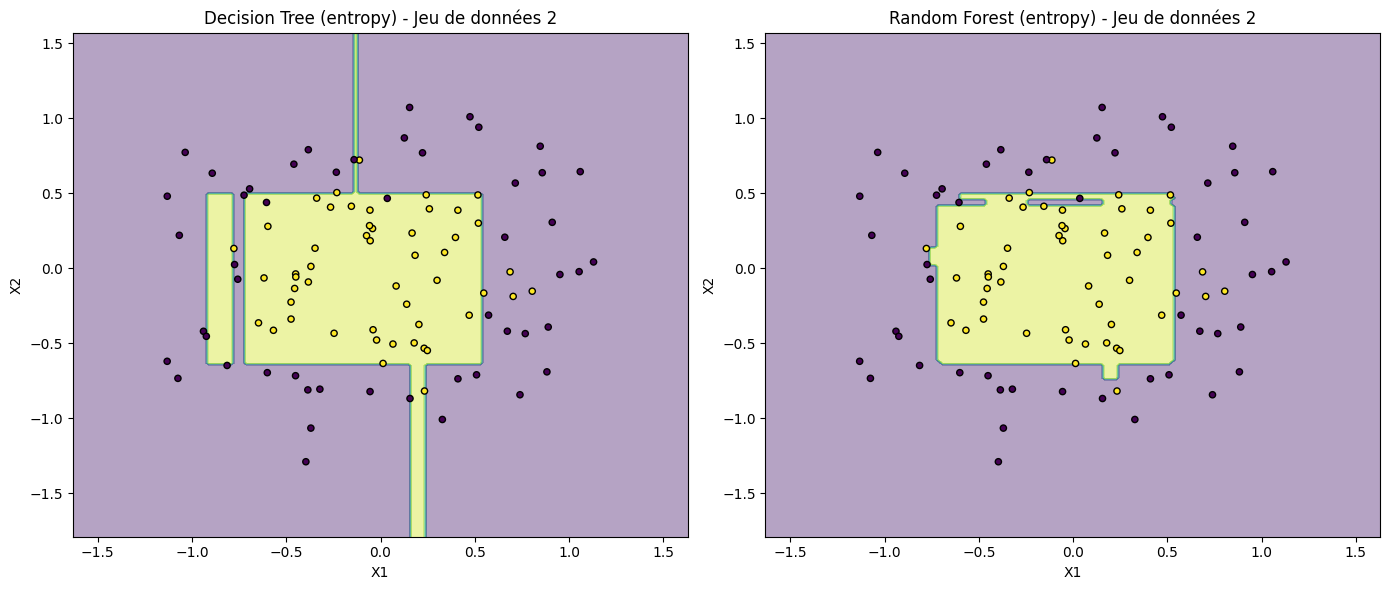

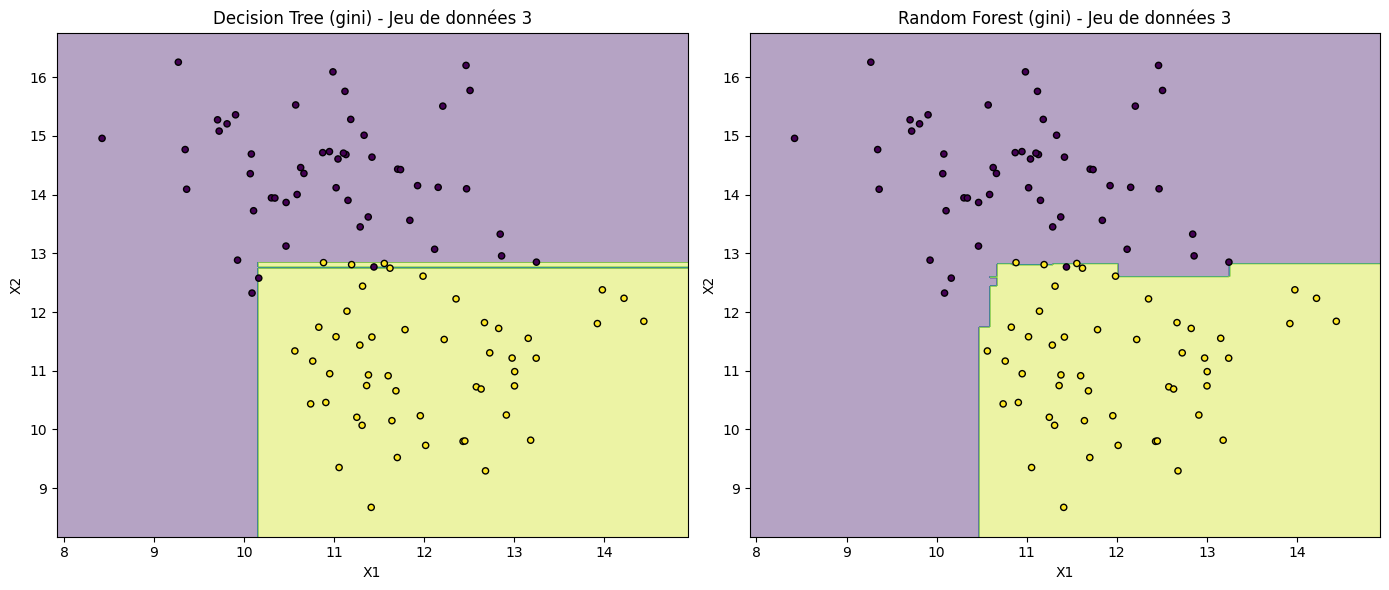

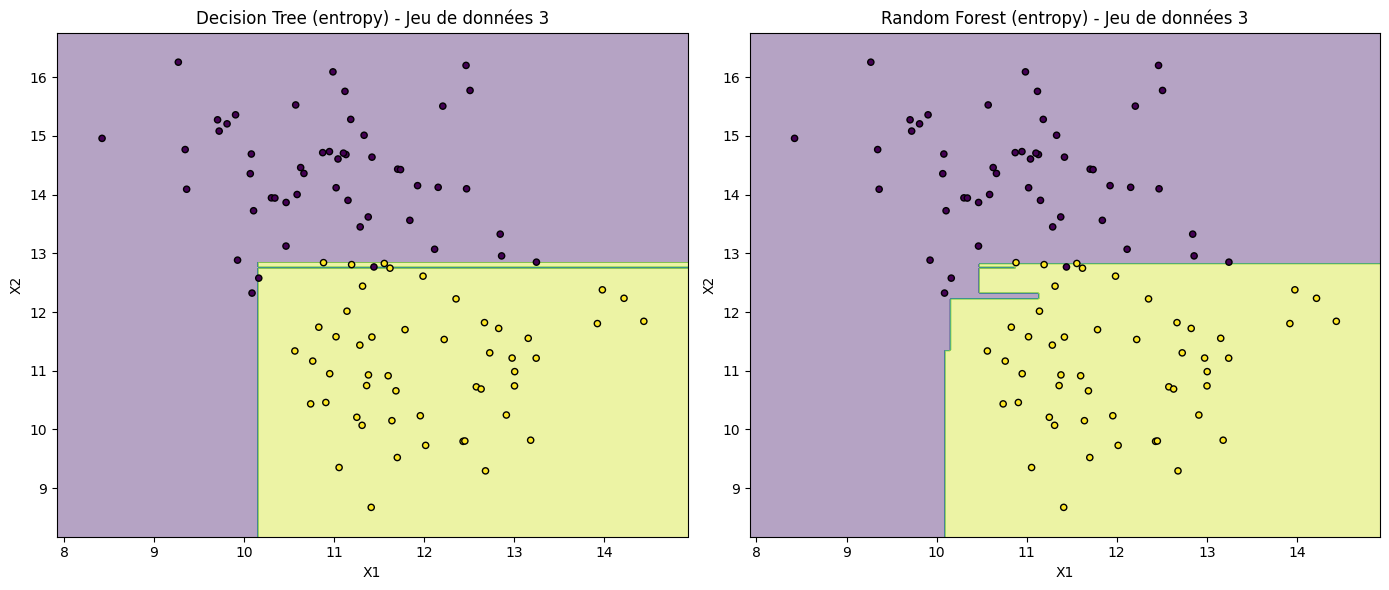

In [ ]:
criteria = ['gini', 'entropy']

for i, (X_np, y_np) in enumerate(datasets):
    # Conversion en DataFrame Pandas
    X = pd.DataFrame(X_np, columns=['X1', 'X2'])
    y = pd.Series(y_np)

    for criterion in criteria:
        # Modèle DecisionTree
        model_tree = DecisionTree(criterion=criterion, max_depth=5)
        model_tree.fit(X, y)

        # Modèle RandomForest
        model_rf = RandomForest(n_estimators=10, criterion=criterion, max_depth=5)
        model_rf.fit(X, y)

        # Tracé des frontières de décision
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        plot_decision_boundary(model_tree, X, y, axes[0], f"Decision Tree ({criterion}) - Jeu de données {i+1}")
        plot_decision_boundary(model_rf, X, y, axes[1], f"Random Forest ({criterion}) - Jeu de données {i+1}")
        plt.tight_layout()
        plt.show()

## Conclusion

Dans cet exercice, nous avons implémenté des algorithmes d'arbres de décision et de forêts aléatoires pour la classification en utilisant uniquement Pandas et Matplotlib. Nous avons appliqué ces algorithmes sur trois jeux de données synthétiques et comparé les performances en utilisant les critères d'impureté 'gini' et 'entropy'.

Les arbres de décision et les forêts aléatoires semblent capable de modéliser des relations non linéaires complexes tous les deux, cependant il semblerait que les forêts aléatoires aient tendance à réduire le surapprentissage grâce à la combinaison de plusieurs arbres de décision.

Les arbres de décision individuels peuvent être sujets au surapprentissage, mais ils constituent la base des forêts aléatoires et restent donc essentiels en quelque sorte.

## Perspectives

Pour améliorer la performance des modèles, on peut :

- Ajuster les hyperparamètres tels que la profondeur maximale (`max_depth`), le nombre d'estimateurs (`n_estimators`), ou le nombre minimum d'échantillons pour diviser un nœud (`min_samples_split`).
- Expérimenter avec différents critères d'impureté (`criterion`).
- Implémenter des méthodes d'élagage (pruning) pour réduire le surapprentissage des arbres individuels.


# **Machine à Vecteurs de Support en Numpy et CVXPY**


Dans cette partie de  notre projet nous allons nous servir principalement de deux librairies principales d'optimisation convexe à  savoir le  **Numpy** et **CVXPY** pour résoudre le problème des **machines à Vecteurs de Supports** appélés **Support Vector Machines** en Anglais.

L'objectif est donc d'implementer SVM en partant de zéro en se basant sur ces deux  bibliothèques conformements aux consignes réçus.

# **Contexte :**
<div>
    <h2>SVM linéaire</h2>
    <p>
        Étant donné un ensemble de données
        (X = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix}  
        et un ensemble de labels y, le problème d’optimisation associé au SVM est le suivant :
    </p>
    <p>
        \[
        \max_{\alpha} \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N y_i y_j \alpha_i \alpha_j x_i^T x_j,
        \]
    </p>
</div>

<div>
    <p>
        s.t.
        \[
        0 \leq \alpha_i \leq C, \quad \forall i \in \{1, \dots, N\}.
        \]
    </p>
    <p>
        Pour prédire la classe d’une nouvelle observation \(x_{\text{test}}\), la règle est la suivante :
    </p>
</div>

<div>
    <p>
        \[
        y^{\text{test}} = \text{sign}(w^T x_{\text{test}} + b) =
        \text{sign}\left(\sum_{i=1}^N \alpha_i y_i x_i^T x_{\text{test}} + b\right),
        \]
    </p>
    
      
     
</div>


 <div>
    <h2>SVM non-linéaire (kernel RBF)</h2>
    <p>
        On peut étendre le cas précédent en utilisant l’astuce du kernel.
        Dans la formulation précédente, on remplace tous les produits \(x_i^T x_j\)
        par le scalaire \(K(x_i, x_j)\), tel que la formule de ce scalaire est définie par rapport au kernel choisi.
    </p>
</div>

<div>
    <p>
        Ici, nous allons utiliser le kernel RBF qui est donné par :
    </p>
    <p>
        \[
        K(x_i, x_j) = \exp(-\eta \|x_i - x_j\|^2), \quad \text{où } \eta = \frac{1}{2 \, \text{var}(X)}.
        \]
    </p>
</div>




In [1]:
# Installons d'abord les bibliothèques nécessaires
!pip install numpy cvxpy matplotlib

In [2]:
#Cette cellule de code concerne notre  classe SVM
import numpy as np
import cvxpy as cp

class SVM:
    def __init__(self, C=None, kernel=None, gamma=None):
        """
        Initialiser le modèle SVM avec les hyperparamètres.
        C : Paramètre de régularisation.
        kernel : Type de noyau (« linear » ou « rbf »).
        gamma : Coefficient du noyau pour RBF.
        """
        self.C = C
        self.kernel = kernel
        self.gamma = gamma  # For RBF kernel
        self.alpha = None
        self.b = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.support_alphas = None

    def _linear_kernel(self, X1, X2):
        """Calcul du noyau linéaire."""
        return np.dot(X1, X2.T)

    def _rbf_kernel(self, X1, X2):
        """Calcul du noyau RBF."""
        if self.gamma is None:
            self.gamma = 1 / (2 * np.var(X1))
        dist_sq = np.sum((X1[:, None] - X2) ** 2, axis=-1)
        return np.exp(-self.gamma * dist_sq)

    def _stabilize_psd(self, K, epsilon=1e-6):
        """
        Stabiliser la matrice du noyau pour garantir qu'elle est PSD.
        Ajoute une petite valeur epsilon à la diagonale.
        """
        return K + epsilon * np.eye(K.shape[0])

    def fit(self, X, y):
        """
        Ajuster le modèle SVM à l'aide de CVXPY.
        X : Données d'entrée (n_échantillons, n_caractéristiques).
        y : Étiquettes (n_échantillons, ) avec des valeurs dans {-1, 1}.
        """
        n_samples, n_features = X.shape
        K = (
            self._linear_kernel(X, X)
            if self.kernel == "linear"
            else self._rbf_kernel(X, X)
        )

        # Stabiliser la matrice du noyau pour éviter les problèmes de convergence
        K = self._stabilize_psd(K)

        # Encapsuler la matrice dans psd_wrap pour CVXPY
        K = cp.psd_wrap(K)

        # Définir les variables d'optimisation
        alpha = cp.Variable(n_samples)
        objective = cp.Maximize(
            cp.sum(alpha) - 0.5 * cp.quad_form(cp.multiply(y, alpha), K)
        )
        constraints = [
            alpha >= 0,
            alpha <= self.C,
            cp.sum(cp.multiply(alpha, y)) == 0,
        ]

        # Résoudre le problème d'optimisation
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Extraire les valeurs de alpha et calculer b
        self.alpha = alpha.value
        support_indices = self.alpha > 1e-5
        self.support_vectors = X[support_indices]
        self.support_vector_labels = y[support_indices]
        self.support_alphas = self.alpha[support_indices]

        # Calculer b en utilisant les vecteurs de support
        self.b = np.mean(
            self.support_vector_labels
            - np.sum(
                self.support_alphas
                * self.support_vector_labels
                * K[support_indices][:, support_indices].value,
                axis=1,
            )
        )


    def predict(self, X):
        """
        Prédire les étiquettes de classe pour les données d'entrée.
        X : Données d'entrée (n_échantillons, n_caractéristiques).
        Retourne : Étiquettes prédites (n_échantillons, ).
        """
        K = (
            self._linear_kernel(X, self.support_vectors)
            if self.kernel == "linear"
            else self._rbf_kernel(X, self.support_vectors)
        )
        decision = (
            np.sum(self.support_alphas * self.support_vector_labels * K, axis=1) + self.b
        )
        return np.sign(decision)


# **Entrainements :**
Dans la partie qui suit ci-dessous, nous allons entraîner des classificateurs SVM pour les trois jeux de données à notre disposition, fournis dans les consignes, à la fois pour le kernel RBF et linéaire. Nous allons également dessiner les droites de marge sur les vecteurs de support pour la limite de décision du kernel linéaire dans chaque cas. Pour le kernel RBF, nous afficherons également la limite de décision. Nous attirons l'attention sur le fait que nous prenons une valeur très élevée de C pour le kernel RBF, au lieu de l'infini, vu l'impossibilité de choisir cette valeur ici. Une valeur exponentiellement grande est choisie pour simuler le cas de l'infini.



Dataset 1:
 - SVM avec noyau linéaire entraîné.


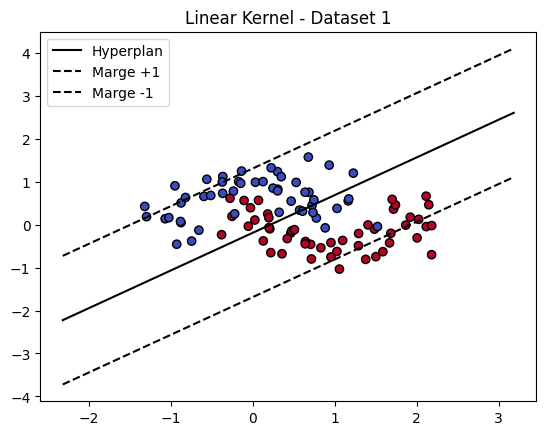

 - SVM avec noyau RBF entraîné.


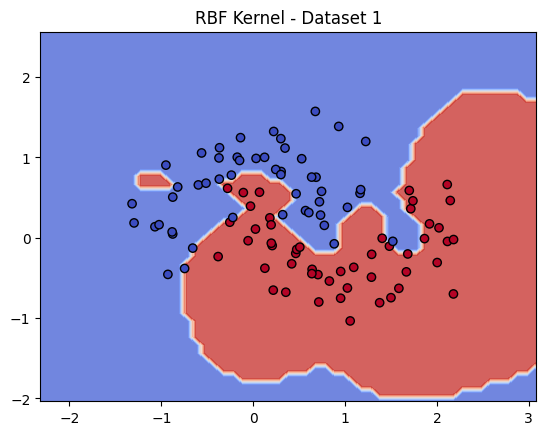

Dataset 2:
 - SVM avec noyau linéaire entraîné.


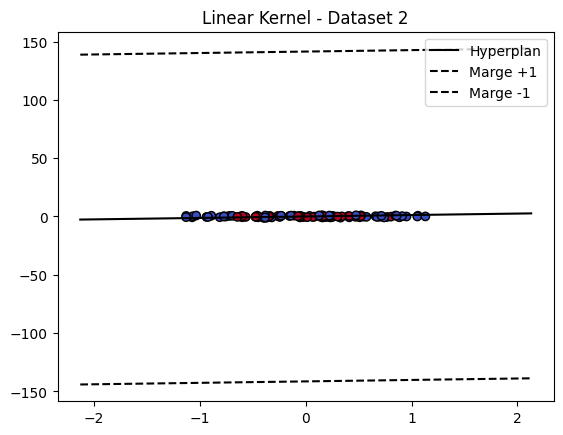

 - SVM avec noyau RBF entraîné.


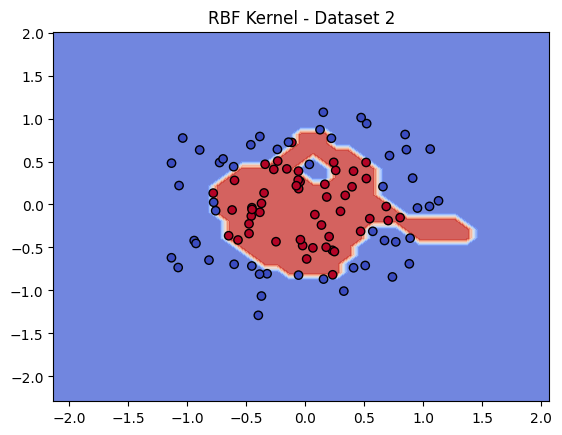

Dataset 3:
 - SVM avec noyau linéaire entraîné.


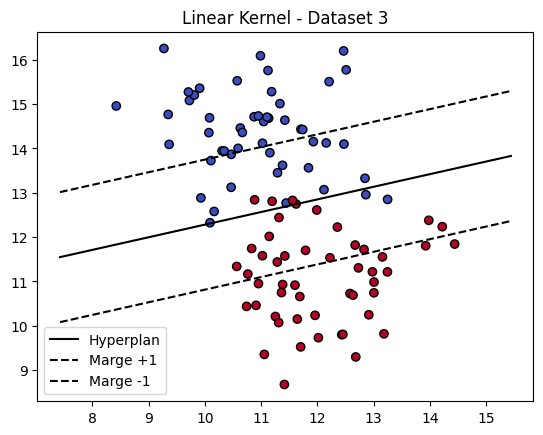

 - SVM avec noyau RBF entraîné.


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


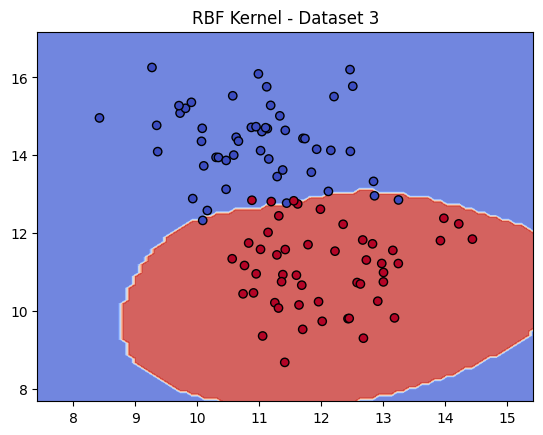

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs

# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Fonction pour tracer la frontière de décision pour le noyau linéaire
def plot_linear_boundary(svm, X, y, title):
    w = np.sum(svm.support_alphas[:, None] * svm.support_vector_labels[:, None] * svm.support_vectors, axis=0)
    b = svm.b

    # Définir les limites
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Tracer l'hyperplan de séparation
    xx = np.linspace(x_min, x_max, 100)
    yy = -(w[0] * xx + b) / w[1]

    # Tracer les marges parallèles
    margin_up = -(w[0] * xx + b - 1) / w[1]
    margin_down = -(w[0] * xx + b + 1) / w[1]

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.plot(xx, yy, 'k-', label='Hyperplan')
    plt.plot(xx, margin_up, 'k--', label='Marge +1')
    plt.plot(xx, margin_down, 'k--', label='Marge -1')
    plt.title(title)
    plt.legend()
    plt.show()

# Fonction pour tracer la frontière de décision pour un noyau générique
def plot_rbf_boundary(svm, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prédire pour chaque point de la grille
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Entraînement et visualisation pour chaque dataset et noyau
for i, (X, y) in enumerate(datasets):
    y = np.where(y == 0, -1, 1)  # Convertir les labels en {-1, 1}

    print(f"Dataset {i+1}:")

    # SVM avec noyau linéaire
    svm_linear = SVM(C=0.025, kernel='linear')
    try:
        svm_linear.fit(X, y)
        print(" - SVM avec noyau linéaire entraîné.")
        plot_linear_boundary(svm_linear, X, y, title=f"Linear Kernel - Dataset {i+1}")
    except Exception as e:
        print(f"Erreur avec le noyau linéaire sur le dataset {i+1}: {e}")

    # SVM avec noyau RBF
    svm_rbf = SVM(C=1e6, kernel='rbf')  # Approximation de C -> +inf
    try:
        svm_rbf.fit(X, y)
        print(" - SVM avec noyau RBF entraîné.")
        plot_rbf_boundary(svm_rbf, X, y, title=f"RBF Kernel - Dataset {i+1}")
    except Exception as e:
        print(f"Erreur avec le noyau RBF sur le dataset {i+1}: {e}")


# **Remarque :**
Dans la partie ci-après, nous avons ajusté (fitté) notre classe SVM sur trois jeux de données différents. De façon visuelle, on peut observer que le kernel RBF est bien adapté aux jeux de données, contrairement au kernel linéaire. En effet, il s'avère important de prendre en compte des éléments clés qui peuvent expliquer cette situation. La première raison fondamentale est qu'en réalité, pour notre modèle avec le kernel linéaire, le coefficient C est très faible, ce qui autorise trop d'erreurs de classification. La seconde raison peut également être due à la forme de la dispersion des points de données. La précision de notre modèle, appris par notre noyau (kernel), pourrait être améliorée si l'on ajuste plus précisément le paramètre C. Pour le kernel RBF, nous obtenons une valeur de l'ordre exponentiel très élevée, ce qui pénalise beaucoup les erreurs de classification.

# **Prédictions :**  
Dans cette partie, nous allons nous amuser à fitter et tester des modèles à partir des trois jeux de données : make_moons (demi-cercles imbriqués), make_circles (cercles concentriques) et make_blobs (blobs de points utilisant deux centres) pour faire des prédictions...




=== Dataset 1 ===
Prédictions (Linéaire) - Dataset 1 :
[-1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
 -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
 -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.
  1. -1. -1.  1.  1.  1.  1.  1. -1. -1.]


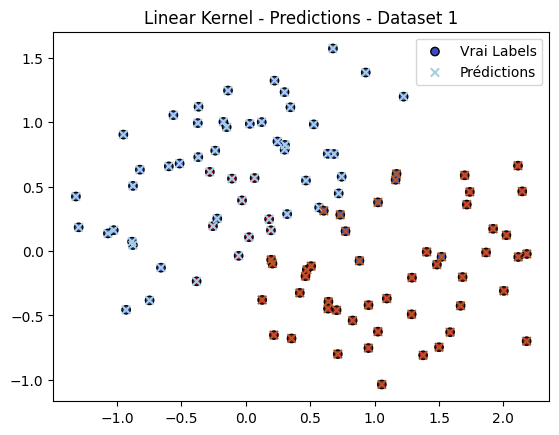

Prédictions (RBF) - Dataset 1 :
[-1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
 -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.
  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.]


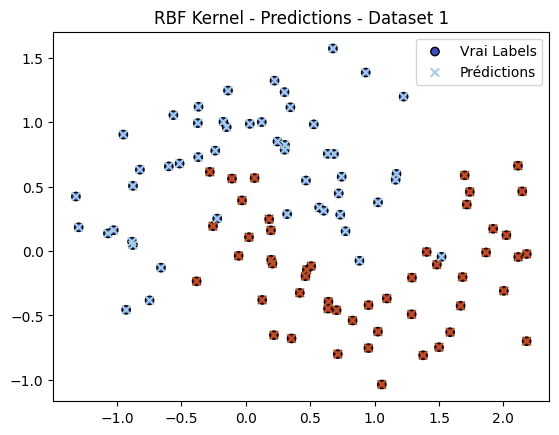


=== Dataset 2 ===
Prédictions (Linéaire) - Dataset 2 :
[-1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1.
  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
 -1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.
  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.]


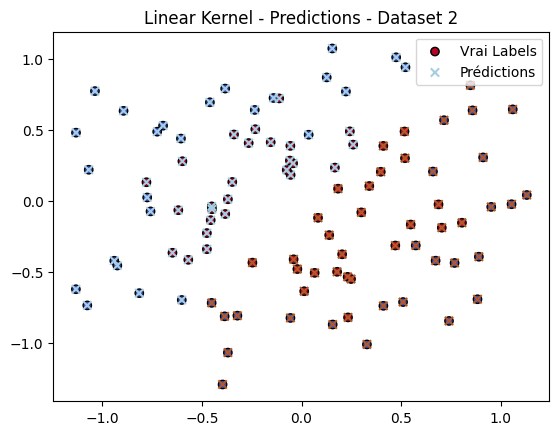

Prédictions (RBF) - Dataset 2 :
[ 1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.
  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1.
 -1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
  1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.
  1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1. -1.  1.  1. -1.  1. -1.  1. -1. -1.]


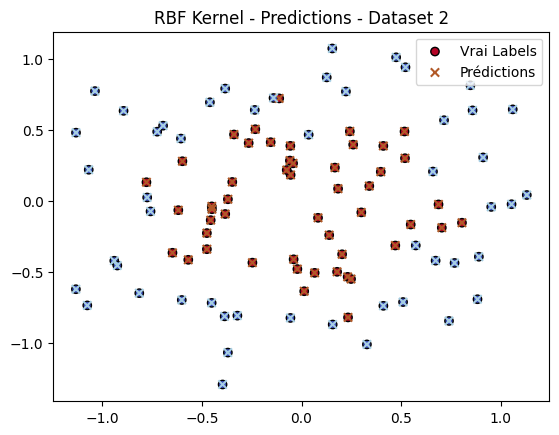


=== Dataset 3 ===
Prédictions (Linéaire) - Dataset 3 :
[ 1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.
  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.
  1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.
  1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.
  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.]


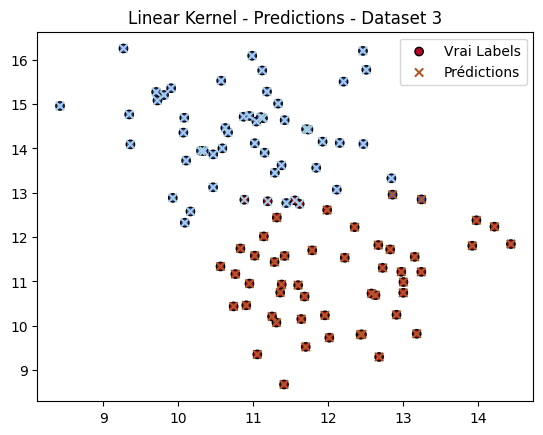

Prédictions (RBF) - Dataset 3 :
[ 1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.
  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.
  1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.
  1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.
  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.]


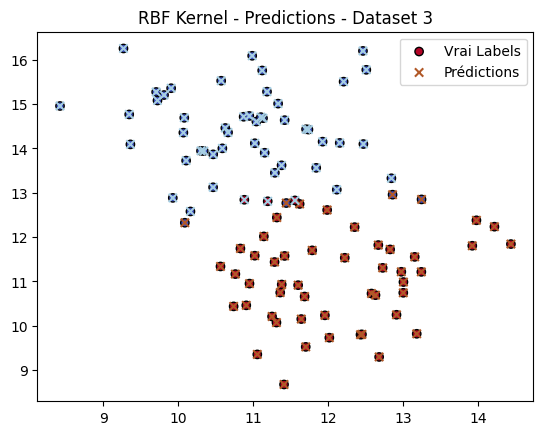

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs

# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Fonction pour afficher les résultats des prédictions
def display_predictions(X, y_true, y_pred, title):
    plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=plt.cm.coolwarm, label='Vrai Labels', edgecolor='k')
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Paired, marker='x', label='Prédictions')
    plt.legend()
    plt.title(title)
    plt.show()

# Prédictions pour chaque dataset
for i, (X, y) in enumerate(datasets):
    y = np.where(y == 0, -1, 1)  # Convertir les labels en {-1, 1}

    print(f"\n=== Dataset {i+1} ===")

    # SVM avec noyau linéaire
    svm_linear = SVM(C=0.025, kernel='linear')
    try:
        svm_linear.fit(X, y)
        y_pred_linear = svm_linear.predict(X)
        print(f"Prédictions (Linéaire) - Dataset {i+1} :\n{y_pred_linear}")
        display_predictions(X, y, y_pred_linear, title=f"Linear Kernel - Predictions - Dataset {i+1}")
    except Exception as e:
        print(f"Erreur avec le noyau linéaire sur le dataset {i+1}: {e}")

    # SVM avec noyau RBF
    svm_rbf = SVM(C=1e6, kernel='rbf')  # Approximation de C -> +inf
    try:
        svm_rbf.fit(X, y)
        y_pred_rbf = svm_rbf.predict(X)
        print(f"Prédictions (RBF) - Dataset {i+1} :\n{y_pred_rbf}")
        display_predictions(X, y, y_pred_rbf, title=f"RBF Kernel - Predictions - Dataset {i+1}")
    except Exception as e:
        print(f"Erreur avec le noyau RBF sur le dataset {i+1}: {e}")


# **Conclusion sur SVM :**
Pour cette partie sur les SVM de notre projet, nous avons appris à nous documenter sur deux bibliothèques essentielles pour les problèmes d'optimisation : plus précisément, Numpy et CVXPY. Cette partie nous a permis de comprendre comment fonctionne réellement le SVM, les enjeux de son écosystème, et comment implémenter une solution SVM à partir de zéro sans utiliser de bibliothèques de machine learning comme scikit-learn. Cela a permis également de développer une fois de plus nos compétences en programmation Python.